In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
from ast import literal_eval

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [2]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/Figure11/"

In [3]:
#connect the amino acid states which are co-exist in extant species 
#load the FP_data 
FP_data = pd.read_csv(readdata_dir + "SuperCompensationFile/SubBufferingAbility.tsv",sep = "\t")
FP_data

,AAstate,ddG_fold,ddG_foldOpt,ddG_bind,compensationAbility,skewness,segment,FitnessImpactScoreRelativeWT
0,9N,0.72,0.72,0.72,0.002540,-1.1448229674266526,12,-0.507580
1,9S,7.29,7.25,7.29,0.002716,-0.2602305963762161,12,-0.209753
2,9R,-8.41,-8.41,-8.41,0.000000,0.10920158145392374,12,0.120027
3,117Y,0.41,1.64,0.39,0.017657,-1.6375509362477878,6,-0.453947
4,203S,20.55,20.56,20.55,0.009337,-1.7458583994160852,5,-1.995300
...,...,...,...,...,...,...,...,...
212,73G,3.14,2.94,2.76,0.000000,-2.0148452988645844,7,-0.979297
213,183T,-2.98,-2.98,-2.99,0.033959,0.9500476240512852,5,0.435834
214,11D,10.69,10.69,10.69,0.003885,-1.3580268517198737,12,-0.506657
215,11N,18.11,17.75,18.11,0.002451,-0.7204515864543307,12,-0.319405


In [4]:
#load the map data 
map_data = pd.read_csv(readdata_dir +  "RSAWCNConservationInterfaceFile/355SpeciesHis3Allignment.csv",sep=",")
map_data

,Species,GeneID,NWAlignmentScore,NWAAs,NWpctID,NWpctSim,NWpctDiff
0,Saccharomyces_cerevisiae,YOR202W,477.333333,MTEQKALVKRITNETKIQIAISLKGGPLAIEHSIFPEKEAEAVAEQ...,100.000000,0.000000,0.000000
1,Saccharomyces_eubayanus,Seq_4114,461.000000,MSEQKALVKRITNETKIQIAIALKGGPLALEHSIFPAREADAVAEQ...,95.454545,3.636364,0.909091
2,Saccharomyces_uvarum,Seq_4353,463.666667,MSEQKALVKRITNETKIQIAIALKGGPLALEHSIFPAREADAVAEQ...,95.454545,4.090909,0.454545
3,Saccharomyces_mikatae,Seq_4723,460.333333,MTEQKALVTRITNETKIQIAISLKGGPLTLEHSIFPEKEIEAVAEQ...,94.090909,4.545455,1.363636
4,Wickerhamiella_domercqiae,Seq_473,-2567.666667,MTEQKTLVRRISNETRIQIAMSLKGGPLAIAHSVFPEKEAEAVAEQ...,88.181818,9.545455,2.272727
...,...,...,...,...,...,...,...
330,yHMPu5000035696_Hanseniaspora_singularis,Seq_2669,249.000000,MAKTAHLYRK-TKETSIQIAIDISGANFNFDNTIFPNKSPEVPSDE...,57.272727,28.181818,14.545455
331,Hanseniaspora_uvarum,Seq_2691,243.000000,MA-KTAHLYRNTKETSIQIAVDITGSNIKTDNSLFPNKSPEPTVES...,56.818182,28.181818,15.000000
332,yHMPu5000034963_Hanseniaspora_clermontiae,Seq_870,239.000000,MA-KTAHLYRDTKETSIQIAVDITGSNFNFDNSLFENRKSEVTIEE...,56.363636,28.636364,15.000000
333,yHMPu5000035695_Hanseniaspora_pseudoguilliermo...,Seq_2647,238.000000,MA-KTAHLYRNTKETSIQIAVDITGSNFNFDQSLFPNKSPEPTNES...,56.363636,27.272727,16.363636


In [5]:
#load the aa_frequency data
aminoacid_20 = ["G","A","V","L","I","P","F","Y","W","S","T","C","M","N","Q","D","E","K","R","H"]
matrix_0_219 = np.zeros((220,20))
count = 0
#store the length 
length = 220
for f_n in range(length):
    f=lambda x:x[f_n]
    #give a list to store the results
    site_aa = map_data["NWAAs"].apply(f)
    site_aa = list(site_aa)
        
    test_ratio = []
    for aa in aminoacid_20:
        test_ratio.append(list(site_aa).count(aa))
    test_ratio = np.array(test_ratio)/sum(np.array(test_ratio))
    matrix_0_219[count] = test_ratio
    count += 1


aa_fre_mul = pd.DataFrame(matrix_0_219)
aa_fre_mul.columns = aminoacid_20
aa_fre_mul

,G,A,V,L,I,P,F,Y,W,S,T,C,M,N,Q,D,E,K,R,H
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002994,0.000000,0.000000,0.000000,0.000000,0.000000,0.997006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003472,0.184028,0.076389,0.010417,0.013889,0.041667,0.003472,0.000000,0.000000,0.302083,0.347222,0.000000,0.000000,0.006944,0.000000,0.003472,0.000000,0.000000,0.006944,0.000000
2,0.004425,0.044248,0.013274,0.000000,0.000000,0.048673,0.004425,0.000000,0.000000,0.017699,0.022124,0.000000,0.000000,0.030973,0.053097,0.048673,0.601770,0.044248,0.066372,0.000000
3,0.000000,0.006192,0.003096,0.003096,0.000000,0.006192,0.000000,0.003096,0.000000,0.018576,0.015480,0.000000,0.006192,0.009288,0.201238,0.006192,0.046440,0.142415,0.510836,0.021672
4,0.000000,0.037975,0.006329,0.003165,0.015823,0.000000,0.041139,0.012658,0.000000,0.139241,0.107595,0.009494,0.000000,0.003165,0.028481,0.000000,0.018987,0.367089,0.202532,0.006329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006024,0.000000,0.000000,0.003012,0.987952,0.003012,0.000000
216,0.996997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003003,0.000000,0.000000,0.000000,0.000000
217,0.000000,0.000000,0.927492,0.000000,0.054381,0.000000,0.000000,0.000000,0.000000,0.000000,0.018127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
218,0.000000,0.000000,0.000000,0.969970,0.021021,0.000000,0.006006,0.000000,0.000000,0.000000,0.000000,0.000000,0.003003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
#load the super compensation data 
supercompensationData = pd.read_csv(readdata_dir + "/SuperCompensationFile/SuperCompensation.tsv",sep = "\t")
supercompensationData = supercompensationData[supercompensationData['segment'] != 10]
supercompensationData

,pair,fitness_diff,all_big05,segment,big05_ratio
0,"('110H', '112T')","[-0.06654743159700016, -0.06644871775000016, 0...","(1717, 3)",1,0.001747
1,"('108M', '106N')","[0.07891315537700005, -0.08550278116999988, 0....","(1831, 0)",1,0.000000
2,"('110N', '115A')","[0.06541953992600014, -0.04289639141800006, 0....","(1339, 0)",1,0.000000
3,"('111F', '135F')","[-0.05800916611699991, -0.08611684957100008, 0...","(6290, 7)",1,0.001113
4,"('110Q', '115A')","[-0.005822927510000131, 0.0078051566499999225,...","(529, 0)",1,0.000000
...,...,...,...,...,...
4555,"('8I', '9R')","[0.0021370757370001714, 0.025072079069999864, ...","(1558, 0)",12,0.000000
4556,"('7F', '8I')","[0.055917004792000014, -0.05138223100200001, 0...","(2940, 1)",12,0.000340
4557,"('7S', '11N')","[0.06220739027199995, -0.022862964830000054, -...","(2933, 1)",12,0.000341
4558,"('24D', '7S')","[0.003630594590000147, 0.05703046647599974, -0...","(1752, 4)",12,0.002283


In [7]:
pair_list_select_list = [ ]
big05_ratio_select_list = [ ]
equal_sign_list = [ ]

for row in range(supercompensationData.shape[0]):
    pair_single = literal_eval(supercompensationData["pair"].values[row])
    big05_ratio_single = supercompensationData["big05_ratio"].values[row]
    
    allele1, allele2 = pair_single
    change_pair_single = str((allele2,allele1))
    if change_pair_single in supercompensationData["pair"].values:
        change_big05_ratio_single = supercompensationData[supercompensationData["pair"] == change_pair_single]["big05_ratio"].values[0]
        if change_big05_ratio_single > big05_ratio_single:
            big05_ratio_select_list.append(change_big05_ratio_single)
            pair_list_select_list.append(change_pair_single)
            equal_sign_list.append(0)
            
        elif change_big05_ratio_single == big05_ratio_single:
            big05_ratio_select_list.append(big05_ratio_single)
            pair_list_select_list.append(str(pair_single)) 
            equal_sign_list.append(1)
              
        else:
            big05_ratio_select_list.append(big05_ratio_single)
            pair_list_select_list.append(str(pair_single))  
            equal_sign_list.append(0)
            
    else:
        big05_ratio_select_list.append(big05_ratio_single)
        pair_list_select_list.append(str(pair_single))
        equal_sign_list.append(0)
        
#make dataframe
select_sc_pair_data = pd.DataFrame({'pair':pair_list_select_list,'big05_ratio':big05_ratio_select_list,
                                 'equal':equal_sign_list})
#remove duplication
select_sc_pair_data_rmdup = select_sc_pair_data.drop_duplicates()
select_sc_pair_data_rmdup

,pair,big05_ratio,equal
0,"('110H', '112T')",0.001747,0
1,"('108M', '106N')",0.000000,1
2,"('115A', '110N')",0.046075,0
3,"('111F', '135F')",0.001113,0
4,"('115A', '110Q')",0.001681,0
...,...,...,...
4119,"('19N', '21L')",0.000000,1
4121,"('20S', '19D')",0.000000,1
4128,"('9R', '23I')",0.000000,1
4129,"('8I', '9R')",0.000000,1


In [8]:
#clean the data again
drop_list = [ ]
for row in range(select_sc_pair_data_rmdup.shape[0]):
    #find the sign
    equal_judge = select_sc_pair_data_rmdup["equal"].values[row]
    if equal_judge == 0:
        continue
        
    pair_single = literal_eval(select_sc_pair_data_rmdup["pair"].values[row])    
    allele1, allele2 = pair_single
    change_pair_single = str((allele2,allele1))
    index = select_sc_pair_data_rmdup[select_sc_pair_data_rmdup["pair"] == change_pair_single].index[0]
    this_index = list(select_sc_pair_data_rmdup.index)[row]
    if this_index < index:
        str_append = "%d:%d"%(this_index,index)
        drop_list.append(str_append)
    else:
        str_append = "%d:%d"%(index,this_index)
        drop_list.append(str_append)
        

drop_list_uniqu = np.unique(drop_list)   
print(len(drop_list_uniqu),len(drop_list))    
drop_list_uniqu   

509 1018


array(['1026:1158', '102:173', '1045:1196', '1088:1335', '1092:1277',
       '115:275', '116:348', '1188:1333', '1228:1245', '122:519',
       '1234:1284', '128:384', '132:203', '1345:1418', '1346:1500',
       '1347:1465', '1349:1614', '1350:1371', '1351:1770', '1353:1706',
       '1354:1592', '1357:1655', '1359:1727', '1361:1578', '1362:1471',
       '1363:1634', '1365:1492', '1367:1804', '1369:1722', '1372:1791',
       '1373:1594', '1374:1725', '1375:1593', '1377:1610', '1378:1732',
       '1379:1417', '1382:1528', '1383:1636', '1384:1405', '1388:1580',
       '1390:1550', '1391:1623', '1392:1526', '1395:1622', '1397:1656',
       '1400:1669', '1401:1705', '1403:1531', '1404:1626', '1406:1785',
       '1407:1617', '1410:1507', '1411:1651', '1414:1741', '1416:1573',
       '1419:1572', '1421:1701', '1422:1772', '1423:1433', '1425:1779',
       '1427:1753', '1428:1501', '1430:1474', '1432:1482', '1435:1694',
       '1437:1745', '1438:1629', '1441:1569', '1443:1586', '1446:1520',
    

In [9]:
#remove the list 
rm_list = [ ]
for single_maohao in drop_list_uniqu:
    single_maohao_list = single_maohao.split(":")
    rm_list.append(int(single_maohao_list[0]))
    
select_sc_pair_data_rmdup_rmequal = select_sc_pair_data_rmdup.drop(rm_list)
select_sc_pair_data_rmdup_rmequal

,pair,big05_ratio,equal
0,"('110H', '112T')",0.001747,0
2,"('115A', '110N')",0.046075,0
3,"('111F', '135F')",0.001113,0
4,"('115A', '110Q')",0.001681,0
5,"('108I', '111F')",0.001004,0
...,...,...,...
4119,"('19N', '21L')",0.000000,1
4121,"('20S', '19D')",0.000000,1
4128,"('9R', '23I')",0.000000,1
4129,"('8I', '9R')",0.000000,1


In [10]:
def split_number_aa(allele):
    number = int(allele[:-1])
    aa = allele[-1]
    return number, aa

#if those position contain SC can toletate the deleterious substitution in other position
#write a function to check if strong compensation occurs with deleterious alleles
def check_if_com_un_com_occur_together(input_aa_seq):
    sc_bad_pair_list = [ ]
    for single_pair in select_sc_pair_data_rmdup_rmequal["pair"].values:
        allele1,allele2 = literal_eval(single_pair)
        n1,aa1 = split_number_aa(allele1)
        n2,aa2 = split_number_aa(allele2)
        aa1_t = input_aa_seq[n1-1]
        aa2_t = input_aa_seq[n2-1]
        if (aa1 == aa1_t) & (aa2 == aa2_t):
            sc_bad_pair_list.append(single_pair)
    return sc_bad_pair_list

In [11]:
all_list = [  ]
for aa_seq in map_data["NWAAs"].values:
    all_list.append(check_if_com_un_com_occur_together(aa_seq))
map_data["sc_pair"] = all_list
map_data

,Species,GeneID,NWAlignmentScore,NWAAs,NWpctID,NWpctSim,NWpctDiff,sc_pair
0,Saccharomyces_cerevisiae,YOR202W,477.333333,MTEQKALVKRITNETKIQIAISLKGGPLAIEHSIFPEKEAEAVAEQ...,100.000000,0.000000,0.000000,[]
1,Saccharomyces_eubayanus,Seq_4114,461.000000,MSEQKALVKRITNETKIQIAIALKGGPLALEHSIFPAREADAVAEQ...,95.454545,3.636364,0.909091,[]
2,Saccharomyces_uvarum,Seq_4353,463.666667,MSEQKALVKRITNETKIQIAIALKGGPLALEHSIFPAREADAVAEQ...,95.454545,4.090909,0.454545,[]
3,Saccharomyces_mikatae,Seq_4723,460.333333,MTEQKALVTRITNETKIQIAISLKGGPLTLEHSIFPEKEIEAVAEQ...,94.090909,4.545455,1.363636,[]
4,Wickerhamiella_domercqiae,Seq_473,-2567.666667,MTEQKTLVRRISNETRIQIAMSLKGGPLAIAHSVFPEKEAEAVAEQ...,88.181818,9.545455,2.272727,"[('157T', '144D'), ('143I', '144D'), ('157T', ..."
...,...,...,...,...,...,...,...,...
330,yHMPu5000035696_Hanseniaspora_singularis,Seq_2669,249.000000,MAKTAHLYRK-TKETSIQIAIDISGANFNFDNTIFPNKSPEVPSDE...,57.272727,28.181818,14.545455,"[('111I', '135F'), ('135F', '110E'), ('111I', ..."
331,Hanseniaspora_uvarum,Seq_2691,243.000000,MA-KTAHLYRNTKETSIQIAVDITGSNIKTDNSLFPNKSPEPTVES...,56.818182,28.181818,15.000000,"[('111I', '135F'), ('135F', '110E'), ('111I', ..."
332,yHMPu5000034963_Hanseniaspora_clermontiae,Seq_870,239.000000,MA-KTAHLYRDTKETSIQIAVDITGSNFNFDNSLFENRKSEVTIEE...,56.363636,28.636364,15.000000,"[('111I', '135F'), ('135F', '110E'), ('111I', ..."
333,yHMPu5000035695_Hanseniaspora_pseudoguilliermo...,Seq_2647,238.000000,MA-KTAHLYRNTKETSIQIAVDITGSNFNFDQSLFPNKSPEPTNES...,56.363636,27.272727,16.363636,"[('111I', '135F'), ('135F', '110E'), ('111I', ..."


In [12]:
#output the compensating substitutions and if the rescuability compensation score
allele2_list = [ ]
compensation_score_list = [ ]

for single_pair in map_data["sc_pair"].values:
    if single_pair:
        allele2_list_single = [ ]
        compensation_score_single_list = [ ]
        for single_sc_pair in single_pair:
            allele1,allele2 = literal_eval(single_sc_pair)
            allele2_list_single.append(allele2)
            
            compensation_score = select_sc_pair_data_rmdup_rmequal[select_sc_pair_data_rmdup_rmequal["pair"] == single_sc_pair]["big05_ratio"].values[0]
            compensation_score_single_list.append(compensation_score)
            
            
        allele2_unique = np.unique(np.array(allele2_list_single))
        allele2_list.append(allele2_unique)
        compensation_score_list.append(compensation_score_single_list)
    else:
        allele2_list.append([])
        compensation_score_list.append([])
        
map_data["allele2"] = allele2_list
map_data["compensation_score"] = compensation_score_list
map_data    

,Species,GeneID,NWAlignmentScore,NWAAs,NWpctID,NWpctSim,NWpctDiff,sc_pair,allele2,compensation_score
0,Saccharomyces_cerevisiae,YOR202W,477.333333,MTEQKALVKRITNETKIQIAISLKGGPLAIEHSIFPEKEAEAVAEQ...,100.000000,0.000000,0.000000,[],[],[]
1,Saccharomyces_eubayanus,Seq_4114,461.000000,MSEQKALVKRITNETKIQIAIALKGGPLALEHSIFPAREADAVAEQ...,95.454545,3.636364,0.909091,[],[],[]
2,Saccharomyces_uvarum,Seq_4353,463.666667,MSEQKALVKRITNETKIQIAIALKGGPLALEHSIFPAREADAVAEQ...,95.454545,4.090909,0.454545,[],[],[]
3,Saccharomyces_mikatae,Seq_4723,460.333333,MTEQKALVTRITNETKIQIAISLKGGPLTLEHSIFPEKEIEAVAEQ...,94.090909,4.545455,1.363636,[],[],[]
4,Wickerhamiella_domercqiae,Seq_473,-2567.666667,MTEQKTLVRRISNETRIQIAMSLKGGPLAIAHSVFPEKEAEAVAEQ...,88.181818,9.545455,2.272727,"[('157T', '144D'), ('143I', '144D'), ('157T', ...","[143I, 144D, 152I, 66F, 73A, 79L, 93A]","[0.0736196319018405, 0.08280701754385965, 0.01..."
...,...,...,...,...,...,...,...,...,...,...
330,yHMPu5000035696_Hanseniaspora_singularis,Seq_2669,249.000000,MAKTAHLYRK-TKETSIQIAIDISGANFNFDNTIFPNKSPEVPSDE...,57.272727,28.181818,14.545455,"[('111I', '135F'), ('135F', '110E'), ('111I', ...","[110E, 111I, 114I, 119Y, 120A, 121Y, 135F, 137...","[0.000580046403712297, 0.049620548744892, 0.00..."
331,Hanseniaspora_uvarum,Seq_2691,243.000000,MA-KTAHLYRNTKETSIQIAVDITGSNIKTDNSLFPNKSPEPTVES...,56.818182,28.181818,15.000000,"[('111I', '135F'), ('135F', '110E'), ('111I', ...","[110E, 111I, 114I, 119Y, 11N, 120A, 121Y, 135F...","[0.000580046403712297, 0.049620548744892, 0.00..."
332,yHMPu5000034963_Hanseniaspora_clermontiae,Seq_870,239.000000,MA-KTAHLYRDTKETSIQIAVDITGSNFNFDNSLFENRKSEVTIEE...,56.363636,28.636364,15.000000,"[('111I', '135F'), ('135F', '110E'), ('111I', ...","[110E, 111I, 114I, 119Y, 120A, 121Y, 135F, 137...","[0.000580046403712297, 0.049620548744892, 0.00..."
333,yHMPu5000035695_Hanseniaspora_pseudoguilliermo...,Seq_2647,238.000000,MA-KTAHLYRNTKETSIQIAVDITGSNFNFDQSLFPNKSPEPTNES...,56.363636,27.272727,16.363636,"[('111I', '135F'), ('135F', '110E'), ('111I', ...","[110E, 111I, 114I, 119Y, 11N, 120A, 121Y, 135F...","[0.000580046403712297, 0.049620548744892, 0.00..."


In [13]:
fitness_impact_score_a1_list = [ ]
fitness_impact_score_a2_list = [ ]
sc_pair_expcet910_list = [ ]
for single_pair in map_data["sc_pair"].values:
    if single_pair:
        
        fitness_impact_a1_list_single = [ ]
        fitness_impact_a2_list_single = [ ]
        inner_sc_pair_expcet910_list = [ ]
        
        for single_sc_pair in single_pair:
            allele1,allele2 = literal_eval(single_sc_pair)
            
            try:
                allele1_score = float(FP_data[FP_data['AAstate'] == allele1]["FitnessImpactScoreRelativeWT"].values[0])
                allele2_score = float(FP_data[FP_data['AAstate'] == allele2]["FitnessImpactScoreRelativeWT"].values[0])
            
                fitness_impact_a1_list_single.append(allele1_score)
                fitness_impact_a2_list_single.append(allele2_score)
                inner_sc_pair_expcet910_list.append(single_sc_pair)
                
            except IndexError:
                continue
            
            
        fitness_impact_score_a1_list.append(fitness_impact_a1_list_single)
        fitness_impact_score_a2_list.append(fitness_impact_a2_list_single)
        sc_pair_expcet910_list.append(inner_sc_pair_expcet910_list)

    else:
        fitness_impact_score_a1_list.append([])
        fitness_impact_score_a2_list.append([])
        sc_pair_expcet910_list.append([])
        
map_data["fitness_impact_allele1"] = fitness_impact_score_a1_list
map_data["fitness_impact_allele2"] = fitness_impact_score_a2_list
map_data["sc_pair_except910"] = sc_pair_expcet910_list
map_data

,Species,GeneID,NWAlignmentScore,NWAAs,NWpctID,NWpctSim,NWpctDiff,sc_pair,allele2,compensation_score,fitness_impact_allele1,fitness_impact_allele2,sc_pair_except910
0,Saccharomyces_cerevisiae,YOR202W,477.333333,MTEQKALVKRITNETKIQIAISLKGGPLAIEHSIFPEKEAEAVAEQ...,100.000000,0.000000,0.000000,[],[],[],[],[],[]
1,Saccharomyces_eubayanus,Seq_4114,461.000000,MSEQKALVKRITNETKIQIAIALKGGPLALEHSIFPAREADAVAEQ...,95.454545,3.636364,0.909091,[],[],[],[],[],[]
2,Saccharomyces_uvarum,Seq_4353,463.666667,MSEQKALVKRITNETKIQIAIALKGGPLALEHSIFPAREADAVAEQ...,95.454545,4.090909,0.454545,[],[],[],[],[],[]
3,Saccharomyces_mikatae,Seq_4723,460.333333,MTEQKALVTRITNETKIQIAISLKGGPLTLEHSIFPEKEIEAVAEQ...,94.090909,4.545455,1.363636,[],[],[],[],[],[]
4,Wickerhamiella_domercqiae,Seq_473,-2567.666667,MTEQKTLVRRISNETRIQIAMSLKGGPLAIAHSVFPEKEAEAVAEQ...,88.181818,9.545455,2.272727,"[('157T', '144D'), ('143I', '144D'), ('157T', ...","[143I, 144D, 152I, 66F, 73A, 79L, 93A]","[0.0736196319018405, 0.08280701754385965, 0.01...","[0.09053747446, -0.033549599999999964, 0.09053...","[0.7589918233, 0.7589918233, -0.03354959999999...","[('157T', '144D'), ('143I', '144D'), ('157T', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,yHMPu5000035696_Hanseniaspora_singularis,Seq_2669,249.000000,MAKTAHLYRK-TKETSIQIAIDISGANFNFDNTIFPNKSPEVPSDE...,57.272727,28.181818,14.545455,"[('111I', '135F'), ('135F', '110E'), ('111I', ...","[110E, 111I, 114I, 119Y, 120A, 121Y, 135F, 137...","[0.000580046403712297, 0.049620548744892, 0.00...","[-0.15654477400000005, -1.2474425770000002, -0...","[-1.2474425770000002, 1.0922892990000002, 0.75...","[('111I', '135F'), ('135F', '110E'), ('111I', ..."
331,Hanseniaspora_uvarum,Seq_2691,243.000000,MA-KTAHLYRNTKETSIQIAVDITGSNIKTDNSLFPNKSPEPTVES...,56.818182,28.181818,15.000000,"[('111I', '135F'), ('135F', '110E'), ('111I', ...","[110E, 111I, 114I, 119Y, 11N, 120A, 121Y, 135F...","[0.000580046403712297, 0.049620548744892, 0.00...","[-0.15654477400000005, -1.2474425770000002, -0...","[-1.2474425770000002, 1.0922892990000002, 0.75...","[('111I', '135F'), ('135F', '110E'), ('111I', ..."
332,yHMPu5000034963_Hanseniaspora_clermontiae,Seq_870,239.000000,MA-KTAHLYRDTKETSIQIAVDITGSNFNFDNSLFENRKSEVTIEE...,56.363636,28.636364,15.000000,"[('111I', '135F'), ('135F', '110E'), ('111I', ...","[110E, 111I, 114I, 119Y, 120A, 121Y, 135F, 137...","[0.000580046403712297, 0.049620548744892, 0.00...","[-0.15654477400000005, -1.2474425770000002, -0...","[-1.2474425770000002, 1.0922892990000002, 0.75...","[('111I', '135F'), ('135F', '110E'), ('111I', ..."
333,yHMPu5000035695_Hanseniaspora_pseudoguilliermo...,Seq_2647,238.000000,MA-KTAHLYRNTKETSIQIAVDITGSNFNFDQSLFPNKSPEPTNES...,56.363636,27.272727,16.363636,"[('111I', '135F'), ('135F', '110E'), ('111I', ...","[110E, 111I, 114I, 119Y, 11N, 120A, 121Y, 135F...","[0.000580046403712297, 0.049620548744892, 0.00...","[-0.15654477400000005, -1.2474425770000002, -0...","[-1.2474425770000002, 1.0922892990000002, 0.75...","[('111I', '135F'), ('135F', '110E'), ('111I', ..."


In [14]:
allele1_fitness_score_all_list = [ ]
allele2_fitness_score_all_list = [ ]
allele_list  = [ ]
name_spe_list = [ ]
for row in range(map_data.shape[0]):
    fitness_score_allele1 = map_data["fitness_impact_allele1"].values[row]
    fitness_score_allele2 = map_data["fitness_impact_allele2"].values[row]
    if fitness_score_allele1:
        name_spe_list.extend([map_data["Species"].values[row]]*len(fitness_score_allele1))
        allele_list.extend(map_data["sc_pair_except910"].values[row])
        if len(map_data["sc_pair_except910"].values[row]) != len(fitness_score_allele1):
            print("error")
        allele1_fitness_score_all_list.extend(fitness_score_allele1)
        allele2_fitness_score_all_list.extend(fitness_score_allele2)

#make data
final_data = pd.DataFrame({'scer':name_spe_list,
                          "allele_pair":allele_list,"allele1":allele1_fitness_score_all_list,
                          "allele2":allele2_fitness_score_all_list})
final_data

,scer,allele_pair,allele1,allele2
0,Wickerhamiella_domercqiae,"('157T', '144D')",0.090537,0.758992
1,Wickerhamiella_domercqiae,"('143I', '144D')",-0.033550,0.758992
2,Wickerhamiella_domercqiae,"('157T', '143I')",0.090537,-0.033550
3,Wickerhamiella_domercqiae,"('148K', '152I')",-0.410683,0.228284
4,Wickerhamiella_domercqiae,"('92S', '93A')",-1.573571,0.453690
...,...,...,...,...
8882,yHAB158_Kazachstania_viticola,"('87V', '66L')",0.357081,0.035153
8883,yHAB158_Kazachstania_viticola,"('93I', '73A')",0.747024,1.489341
8884,yHAB158_Kazachstania_viticola,"('87V', '73A')",0.357081,1.489341
8885,yHAB158_Kazachstania_viticola,"('73A', '66L')",1.489341,0.035153


In [15]:
#nake a function to return the right fitness impact score rank
big_allele_list = [ ]
small_allele_list = [ ]
pair_rank_list = [ ]
for single_row in range(final_data.shape[0]):
    allele1_fp = final_data["allele1"].values[single_row]
    allele2_fp = final_data["allele2"].values[single_row]
    allele_pair_single = literal_eval(final_data["allele_pair"].values[single_row])
    pair1,pair2 = allele_pair_single
    
    if allele1_fp > allele2_fp:
        big_allele_list.append(allele1_fp)
        small_allele_list.append(allele2_fp)
        pair_rank_list.append(str((pair1,pair2)))
    else:
        big_allele_list.append(allele2_fp)
        small_allele_list.append(allele1_fp)
        pair_rank_list.append(str((pair2,pair1)))
re_rank_final_data = pd.DataFrame({"scer":final_data["scer"].values,"allele_pair":pair_rank_list,
                                  "big_allele1":big_allele_list,
                                 "small_allele2":small_allele_list })
re_rank_final_data

,scer,allele_pair,big_allele1,small_allele2
0,Wickerhamiella_domercqiae,"('144D', '157T')",0.758992,0.090537
1,Wickerhamiella_domercqiae,"('144D', '143I')",0.758992,-0.033550
2,Wickerhamiella_domercqiae,"('157T', '143I')",0.090537,-0.033550
3,Wickerhamiella_domercqiae,"('152I', '148K')",0.228284,-0.410683
4,Wickerhamiella_domercqiae,"('93A', '92S')",0.453690,-1.573571
...,...,...,...,...
8882,yHAB158_Kazachstania_viticola,"('87V', '66L')",0.357081,0.035153
8883,yHAB158_Kazachstania_viticola,"('73A', '93I')",1.489341,0.747024
8884,yHAB158_Kazachstania_viticola,"('73A', '87V')",1.489341,0.357081
8885,yHAB158_Kazachstania_viticola,"('73A', '66L')",1.489341,0.035153


In [16]:
bin_list = [ ]
for fp_score_single in re_rank_final_data["small_allele2"].values:
    if (fp_score_single < -7) & (fp_score_single >= -9):
        bin_list.append("bin1")
    elif (fp_score_single < -4) & (fp_score_single >= -7):
        bin_list.append("bin2")
    elif (fp_score_single < -1) & (fp_score_single >= -4):
        bin_list.append("bin3")
    else:
        bin_list.append("bin4")



re_rank_final_data["bin_rank"] = bin_list
re_rank_final_data = re_rank_final_data.sort_values("allele_pair")
re_rank_final_data = re_rank_final_data.reset_index(drop=True)
re_rank_final_data

,scer,allele_pair,big_allele1,small_allele2,bin_rank
0,Candida_orthopsilosis,"('102L', '104L')",0.094265,-2.424419,bin3
1,yHMPu5000034742_Lipomyces_suomiensis,"('102L', '104L')",0.094265,-2.424419,bin3
2,yHMPu5000035707_Candida_heveicola,"('102L', '105H')",0.094265,-0.682002,bin4
3,Clavispora_lusitaniae,"('102L', '105H')",0.094265,-0.682002,bin4
4,yHMPu5000035018_Candida_canberraensis,"('102L', '105H')",0.094265,-0.682002,bin4
...,...,...,...,...,...
8882,Metschnikowia_kipukae,"('9S', '24D')",-0.209753,-0.709786,bin4
8883,yHMPu5000035018_Candida_canberraensis,"('9S', '24D')",-0.209753,-0.709786,bin4
8884,Metschnikowia_arizonensis,"('9S', '24D')",-0.209753,-0.709786,bin4
8885,Metschnikowia_shivogae,"('9S', '24D')",-0.209753,-0.709786,bin4


In [17]:
unique_allele_pair_list = np.unique(re_rank_final_data["allele_pair"].values)
scer_list = [ ]
big_allele1_list = [ ]
small_allele2_list = [ ]
bin_rank_list = [ ]
allele_pair_list = [ ]
for unique_allele_pair in unique_allele_pair_list:
    re_rank_final_data_unique = re_rank_final_data[re_rank_final_data["allele_pair"] == unique_allele_pair]
    scer_list.append(list(re_rank_final_data_unique["scer"].values))
    big_allele1_list.append(re_rank_final_data_unique["big_allele1"].values[0])
    small_allele2_list.append(re_rank_final_data_unique["small_allele2"].values[0])
    bin_rank_list.append(re_rank_final_data_unique["bin_rank"].values[0])
    allele_pair_list.append(unique_allele_pair)
#make a data
rank_unique_aa_pair_data = pd.DataFrame({"species":scer_list,
                                        "allele_pair":allele_pair_list,
                                        "big_allele1":big_allele1_list,
                                        "small_allele2":small_allele2_list,
                                        "bin":bin_rank_list})
rank_unique_aa_pair_data = rank_unique_aa_pair_data.sort_values("small_allele2")
rank_unique_aa_pair_data = rank_unique_aa_pair_data.reset_index(drop=True)
rank_unique_aa_pair_data

,species,allele_pair,big_allele1,small_allele2,bin
0,"[yHMPu5000034635_Nadsonia_fulvescens, Yarrowia...","('143T', '163I')",-2.740568,-8.207916,bin1
1,"[Candida_parapsilosis, Candida_apicola]","('143I', '163I')",-0.033550,-8.207916,bin1
2,[yHMPu5000034748_Lipomyces_oligophaga],"('137G', '163I')",1.642935,-8.207916,bin1
3,"[Yarrowia_deformans, Yarrowia_keelungensis, Na...","('141C', '163I')",0.893600,-8.207916,bin1
4,"[yHMPu5000034635_Nadsonia_fulvescens, Candida_...","('144D', '163I')",0.758992,-8.207916,bin1
...,...,...,...,...,...
812,"[Nakaseomyces_bacillisporus, Metschnikowia_bow...","('171A', '198I')",1.236126,0.759107,bin4
813,"[yHMPu5000035658_Starmera_amethionina, yHMPu50...","('171A', '198L')",1.236126,0.822249,bin4
814,"[Metschnikowia_kipukae, yHMPu5000034883_Petero...","('169Q', '170G')",1.325175,0.981036,bin4
815,"[Kazachstania_africana, yHAB155_Kazachstania_s...","('73A', '93V')",1.489341,1.482571,bin4


In [18]:
#add the shuffle information
import random
FP_data_substitution_list = set(FP_data["AAstate"].values)

random.seed(13)
random_allele1_fs_list = [ ]
random_allele2_fs_list = [ ]
for _ in range(1000):
    allele1,allele2 = random.sample(FP_data_substitution_list,2)
    allele1_fs = float(FP_data[FP_data["AAstate"] == allele1]["FitnessImpactScoreRelativeWT"].values[0])
    allele2_fs = float(FP_data[FP_data["AAstate"] == allele2]["FitnessImpactScoreRelativeWT"].values[0])
    random_allele1_fs_list.append(allele1_fs)
    random_allele2_fs_list.append(allele2_fs)
#data
random_shuffle_data = pd.DataFrame({"shuffle_allele1":random_allele1_fs_list,
                                    "shuffle_allele2":random_allele2_fs_list})
#re-rank the data which big_allele1 and small_allele2
random_big_allele1_list = [ ]
random_small_allele2_list = [ ]
for single_row in range(1000):
    shuffle_allele1 = random_shuffle_data["shuffle_allele1"].values[single_row]
    shuffle_allele2 = random_shuffle_data["shuffle_allele2"].values[single_row]
    if shuffle_allele1 > shuffle_allele2:
        random_big_allele1_list.append(shuffle_allele1)
        random_small_allele2_list.append(shuffle_allele2)
    else:
        random_big_allele1_list.append(shuffle_allele2)
        random_small_allele2_list.append(shuffle_allele1)
        
random_shuffle_rank_data = pd.DataFrame({"big_allele1":random_big_allele1_list,
                                    "small_allele2":random_small_allele2_list})
                    
random_shuffle_rank_data = random_shuffle_rank_data.sort_values("small_allele2")
random_shuffle_rank_data = random_shuffle_rank_data.reset_index(drop=True)
random_shuffle_rank_data

,big_allele1,small_allele2
0,0.202834,-13.596258
1,0.286752,-13.596258
2,-2.128851,-13.596258
3,-0.507580,-13.596258
4,-1.451697,-13.596258
...,...,...
995,1.605798,0.758992
996,1.325175,0.902991
997,1.236126,0.981036
998,1.534546,1.228445


In [19]:
random_bin_list = [ ]
for fp_score_single in random_shuffle_rank_data["small_allele2"].values:
    if fp_score_single < -7:
        random_bin_list.append("bin1")
    elif (fp_score_single < -4) & (fp_score_single >= -7):
        random_bin_list.append("bin2")
    elif (fp_score_single < -1) & (fp_score_single >= -4):
        random_bin_list.append("bin3")
    else:
        random_bin_list.append("bin4")
        
random_shuffle_rank_data["bin"] = random_bin_list
random_shuffle_rank_data

,big_allele1,small_allele2,bin
0,0.202834,-13.596258,bin1
1,0.286752,-13.596258,bin1
2,-2.128851,-13.596258,bin1
3,-0.507580,-13.596258,bin1
4,-1.451697,-13.596258,bin1
...,...,...,...
995,1.605798,0.758992,bin4
996,1.325175,0.902991,bin4
997,1.236126,0.981036,bin4
998,1.534546,1.228445,bin4


In [20]:
for bin_s in ["bin1","bin2","bin3","bin4"]:
    small_all2 = rank_unique_aa_pair_data[rank_unique_aa_pair_data["bin"] == bin_s]["small_allele2"].values
    print(np.mean(small_all2))


-8.09121351
-5.6144697875
-1.8573737611353374
-0.3380854744579039


In [21]:
rank_unique_big_allele1_data = [list(rank_unique_aa_pair_data[rank_unique_aa_pair_data["bin"] == "bin1"]["big_allele1"].values),
                               list(rank_unique_aa_pair_data[rank_unique_aa_pair_data["bin"] == "bin2"]["big_allele1"].values),
                               list(rank_unique_aa_pair_data[rank_unique_aa_pair_data["bin"] == "bin3"]["big_allele1"].values),
                               list(rank_unique_aa_pair_data[rank_unique_aa_pair_data["bin"] == "bin4"]["big_allele1"].values)
                               ]
random_shuffle_big_allele1_data = [list(random_shuffle_rank_data[random_shuffle_rank_data["bin"] == "bin1"]["big_allele1"].values),
                               list(random_shuffle_rank_data[random_shuffle_rank_data["bin"] == "bin2"]["big_allele1"].values),
                               list(random_shuffle_rank_data[random_shuffle_rank_data["bin"] == "bin3"]["big_allele1"].values),
                               list(random_shuffle_rank_data[random_shuffle_rank_data["bin"] == "bin4"]["big_allele1"].values)
                               ]

In [22]:
#plot the nomalized boxplot
#print the median number of the random shuffle results and normalize the data
for i in random_shuffle_big_allele1_data:
    print(np.median(i))
#return the normalized extant data
rank_unique_big_allele1_data_normalize = [ ]
for i,j in zip(rank_unique_big_allele1_data,random_shuffle_big_allele1_data):
    normalized_factor = np.mean(j)
    rank_normalize = [k-normalized_factor for k in i]
    rank_unique_big_allele1_data_normalize.append(rank_normalize)

-0.5546647389999999
-0.40762301375
-0.2922613483
0.22913905110000005


In [23]:
#make the data composed of the data point
binName_list = [ ]
dataList = [ ]
count = 1
for i in rank_unique_big_allele1_data_normalize:
    binName_list.extend([count]*len(i))
    dataList.extend(i)
    count += 1
    
#make the dataframe
binNameData = pd.DataFrame({"data":dataList,
                           "bin":binName_list})
binNameData

,data,bin
0,-1.629231,1
1,1.077787,1
2,2.754272,1
3,2.004937,1
4,1.870329,1
...,...,...
812,0.880022,4
813,0.880022,4
814,0.969071,4
815,1.133236,4


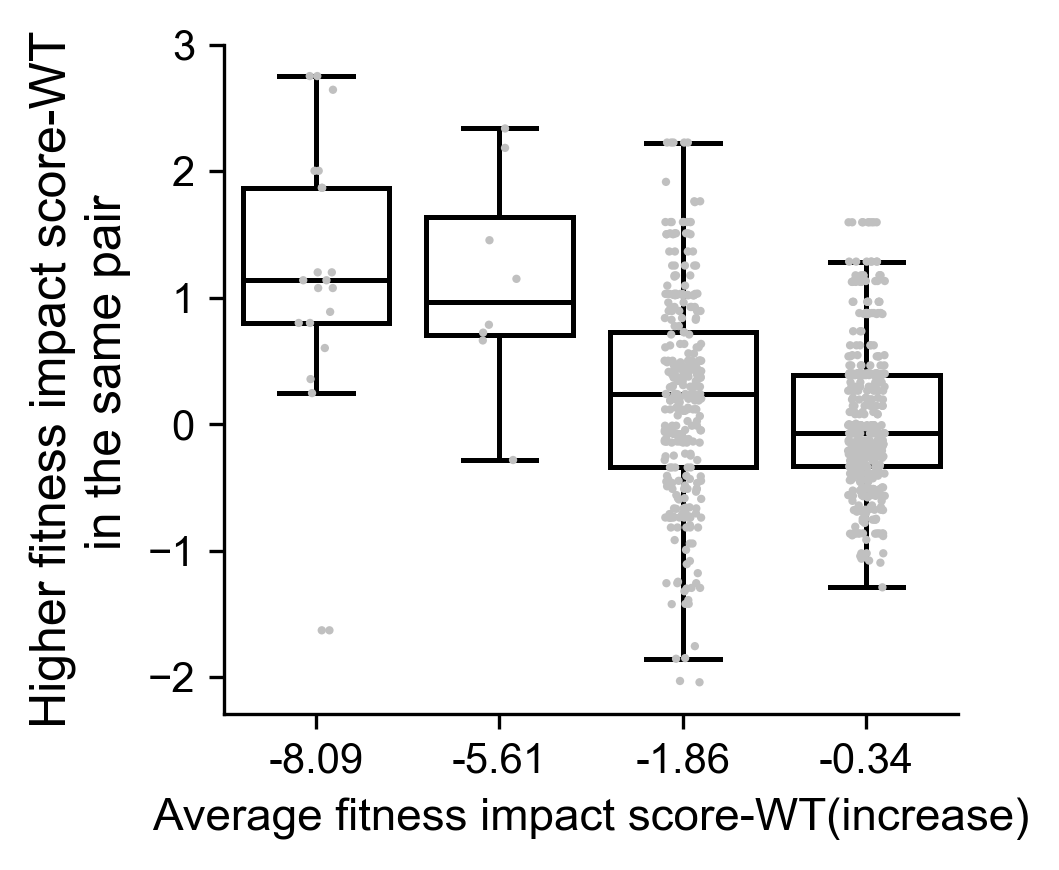

In [24]:
#plot the figures
import seaborn as sns

plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(3.5,3))
ax = plt.subplot(111)
sns.boxplot(x = "bin", y = "data", data = binNameData,
            linewidth=1.2,color="white",fliersize=0,
           order = [1,2,3,4], ax = ax)

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = "k"
    artist.set_edgecolor(col)
    
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

sns.stripplot(x = "bin", y = "data", data = binNameData,size=2
              ,jitter=0.1,ax=ax,order = [1,2,3,4],color = "silver")
    
ticks = ['-8.09', '-5.61','-1.86','-0.34']
plt.xticks(range(4), ticks, fontsize = 10)
plt.yticks(fontsize = 10)
#set label
plt.xlabel("Average fitness impact score-WT(increase)",fontsize = 11)
plt.ylabel("Higher fitness impact score-WT\n in the same pair",fontsize = 12)

#ignore the top and right line 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "SCCoexistWithBad.png",
           dpi = 300)

In [25]:
#utest to test the results!
print(stats.mannwhitneyu(binNameData[binNameData["bin"] == 1]["data"].values,
                        binNameData[binNameData["bin"] == 2]["data"].values,
                        alternative = "greater"))

print(stats.mannwhitneyu(binNameData[binNameData["bin"] == 2]["data"].values,
                        binNameData[binNameData["bin"] == 3]["data"].values,
                        alternative = "greater"))


print(stats.mannwhitneyu(binNameData[binNameData["bin"] == 3]["data"].values,
                        binNameData[binNameData["bin"] == 4]["data"].values,
                        alternative = "greater"))

MannwhitneyuResult(statistic=89.0, pvalue=0.41301573046447193)
MannwhitneyuResult(statistic=2012.0, pvalue=0.0028779997514229855)
MannwhitneyuResult(statistic=88147.0, pvalue=1.1793847783722634e-05)


In [26]:
#details the co-exist of the pair of AA states 
#1.add the exact positions of single AA state
import re
mut_posList = [ ]
for single_aa in FP_data["AAstate"].values:
    pos_single = [int(i) for i in re.findall("\d+", single_aa)][0]
    mut_posList.append(pos_single)
FP_data["mut_pos"] = mut_posList
FP_data

,AAstate,ddG_fold,ddG_foldOpt,ddG_bind,compensationAbility,skewness,segment,FitnessImpactScoreRelativeWT,mut_pos
0,9N,0.72,0.72,0.72,0.002540,-1.1448229674266526,12,-0.507580,9
1,9S,7.29,7.25,7.29,0.002716,-0.2602305963762161,12,-0.209753,9
2,9R,-8.41,-8.41,-8.41,0.000000,0.10920158145392374,12,0.120027,9
3,117Y,0.41,1.64,0.39,0.017657,-1.6375509362477878,6,-0.453947,117
4,203S,20.55,20.56,20.55,0.009337,-1.7458583994160852,5,-1.995300,203
...,...,...,...,...,...,...,...,...,...
212,73G,3.14,2.94,2.76,0.000000,-2.0148452988645844,7,-0.979297,73
213,183T,-2.98,-2.98,-2.99,0.033959,0.9500476240512852,5,0.435834,183
214,11D,10.69,10.69,10.69,0.003885,-1.3580268517198737,12,-0.506657,11
215,11N,18.11,17.75,18.11,0.002451,-0.7204515864543307,12,-0.319405,11


In [27]:
#if aa state has more than 20 times occur in the extant species, just label it out!
experiment_assay_AA = FP_data["AAstate"].values
Nsp_list = [ ]
for sp_list in rank_unique_aa_pair_data["species"].values:
    Nsp_list.append(len(sp_list))
rank_unique_aa_pair_data["Nsp"] =  Nsp_list  
extant_aa_list = [ ]
for single_allele in rank_unique_aa_pair_data["allele_pair"].values:
    single_allele_list = literal_eval(single_allele)
    a,b = single_allele_list
    extant_aa_list.append(a)
    extant_aa_list.append(b)
non_extant_aa_list = [ ] #this is the list for non-extant AA state in the 355 species 

for measured_aa in experiment_assay_AA:
    if measured_aa not in extant_aa_list:
        non_extant_aa_list.append(measured_aa)
        
##only label the corresbinding name of the AAstates which has more than 10 times, just label this !
label_aastates_list = [ ]
for single_pair , single_count in zip(rank_unique_aa_pair_data["allele_pair"].values,
                                     rank_unique_aa_pair_data["Nsp"].values):
    if single_count >= 10:
        single_pair_list = literal_eval(single_pair)
        a,b = single_pair_list
        label_aastates_list.append(a)
        label_aastates_list.append(b)
label_aastates_list

['143I',
 '163V',
 '140F',
 '163V',
 '144D',
 '163V',
 '157T',
 '163V',
 '59V',
 '62F',
 '152I',
 '170T',
 '105H',
 '99S',
 '102M',
 '99S',
 '102L',
 '99S',
 '171A',
 '195S',
 '207T',
 '203S',
 '204I',
 '203S',
 '206S',
 '203S',
 '210D',
 '203S',
 '211E',
 '203S',
 '189A',
 '203S',
 '201K',
 '203S',
 '201K',
 '206L',
 '207T',
 '206L',
 '169Q',
 '164I',
 '148K',
 '164I',
 '152I',
 '164I',
 '170G',
 '164I',
 '73A',
 '92S',
 '93A',
 '92S',
 '86Y',
 '92S',
 '66L',
 '92S',
 '148K',
 '154Q',
 '105H',
 '99T',
 '102L',
 '99T',
 '148K',
 '154E',
 '198I',
 '173V',
 '175M',
 '173V',
 '171A',
 '173V',
 '172G',
 '173V',
 '180I',
 '173V',
 '28V',
 '27A',
 '28I',
 '27A',
 '24D',
 '20S',
 '21L',
 '20S',
 '148K',
 '170S',
 '169Q',
 '170S',
 '152I',
 '170S',
 '207T',
 '209K',
 '204I',
 '209K',
 '201K',
 '209K',
 '189A',
 '209K',
 '210D',
 '209K',
 '66L',
 '73G',
 '93A',
 '73G',
 '82V',
 '59V',
 '79L',
 '59V',
 '56Q',
 '59V',
 '204I',
 '206S',
 '201K',
 '206S',
 '189A',
 '206S',
 '211E',
 '206S',
 '210D'

In [28]:
#add segments information for AA pair data 
seg_list = [ ]
for single_pair in rank_unique_aa_pair_data["allele_pair"].values:
    a,b  = literal_eval(single_pair)
    segment  = FP_data[FP_data["AAstate"] == a]["segment"].values[0]
    seg_list.append(segment)
rank_unique_aa_pair_data["segment"] = seg_list

In [29]:
#3. make some functions that help plot the figures
def drow_box(pos,sc_score,ax,subname,count,site_N,yrange):
    greenColor = "lightgreen"
    purpleColor = "plum" 
    
    if subname not in label_aastates_list:
        alphaColor = 0
    else:
        alphaColor = 1
        
    if count == 1:
        if sc_score > 0:
            ax.add_patch(patches.Rectangle((pos,sc_score), site_N/15, yrange/15, edgecolor = "black",linewidth = 0.5,
                                           facecolor = greenColor,zorder = 1,label = "SC"))
            if alphaColor == 1:
                plt.text(pos+site_N/500,sc_score + yrange/40
                         ,subname,fontsize = 7,color = "white" )
        else:
            ax.add_patch(patches.Rectangle((pos,sc_score), site_N/15, yrange/15, edgecolor = "black",linewidth = 0.5, facecolor = purpleColor ,
                                           zorder = 1,label = "Non-SC"))
            if alphaColor == 1:
                plt.text(pos+site_N/500,sc_score + yrange/40
                         ,subname,fontsize = 7,color = "white" )
    else:
        if sc_score > 0:
            ax.add_patch(patches.Rectangle((pos,sc_score  ), site_N/15, yrange/15, edgecolor = "black",linewidth = 0.5, facecolor =  greenColor,
                                           zorder = 1))
            if alphaColor == 1:
                plt.text(pos + site_N/500,sc_score + yrange/40
                         ,subname,fontsize = 7,color =  "white")
        else:
            ax.add_patch(patches.Rectangle((pos,sc_score), site_N/15, yrange/15, edgecolor = "black",linewidth = 0.5, facecolor = purpleColor  ,        
                                           zorder = 1))
            if alphaColor == 1:
                plt.text(pos + site_N/500,sc_score + yrange/40
                         ,subname,fontsize = 7,color = "white" )        
    
def add_arrow(pair1,pair2,count,site_N):
    pair1_pos = [int(i) for i in re.findall("\d+", pair1)][0]
    pair2_pos = [int(i) for i in re.findall("\d+", pair2)][0]
    pair1_index = unique_pos_list.index(pair1_pos)
    pair2_index = unique_pos_list.index(pair2_pos)
    pair1_fi = FP_data[FP_data["AAstate"] == pair1]["FitnessImpactScoreRelativeWT"].values[0]
    pair2_fi = FP_data[FP_data["AAstate"] == pair2]["FitnessImpactScoreRelativeWT"].values[0]
    lw = count/50
    plt.plot([pair1_index + site_N/30,pair2_index+ site_N/30],[pair1_fi,pair2_fi],linewidth = lw,color = "k",zorder = 0)

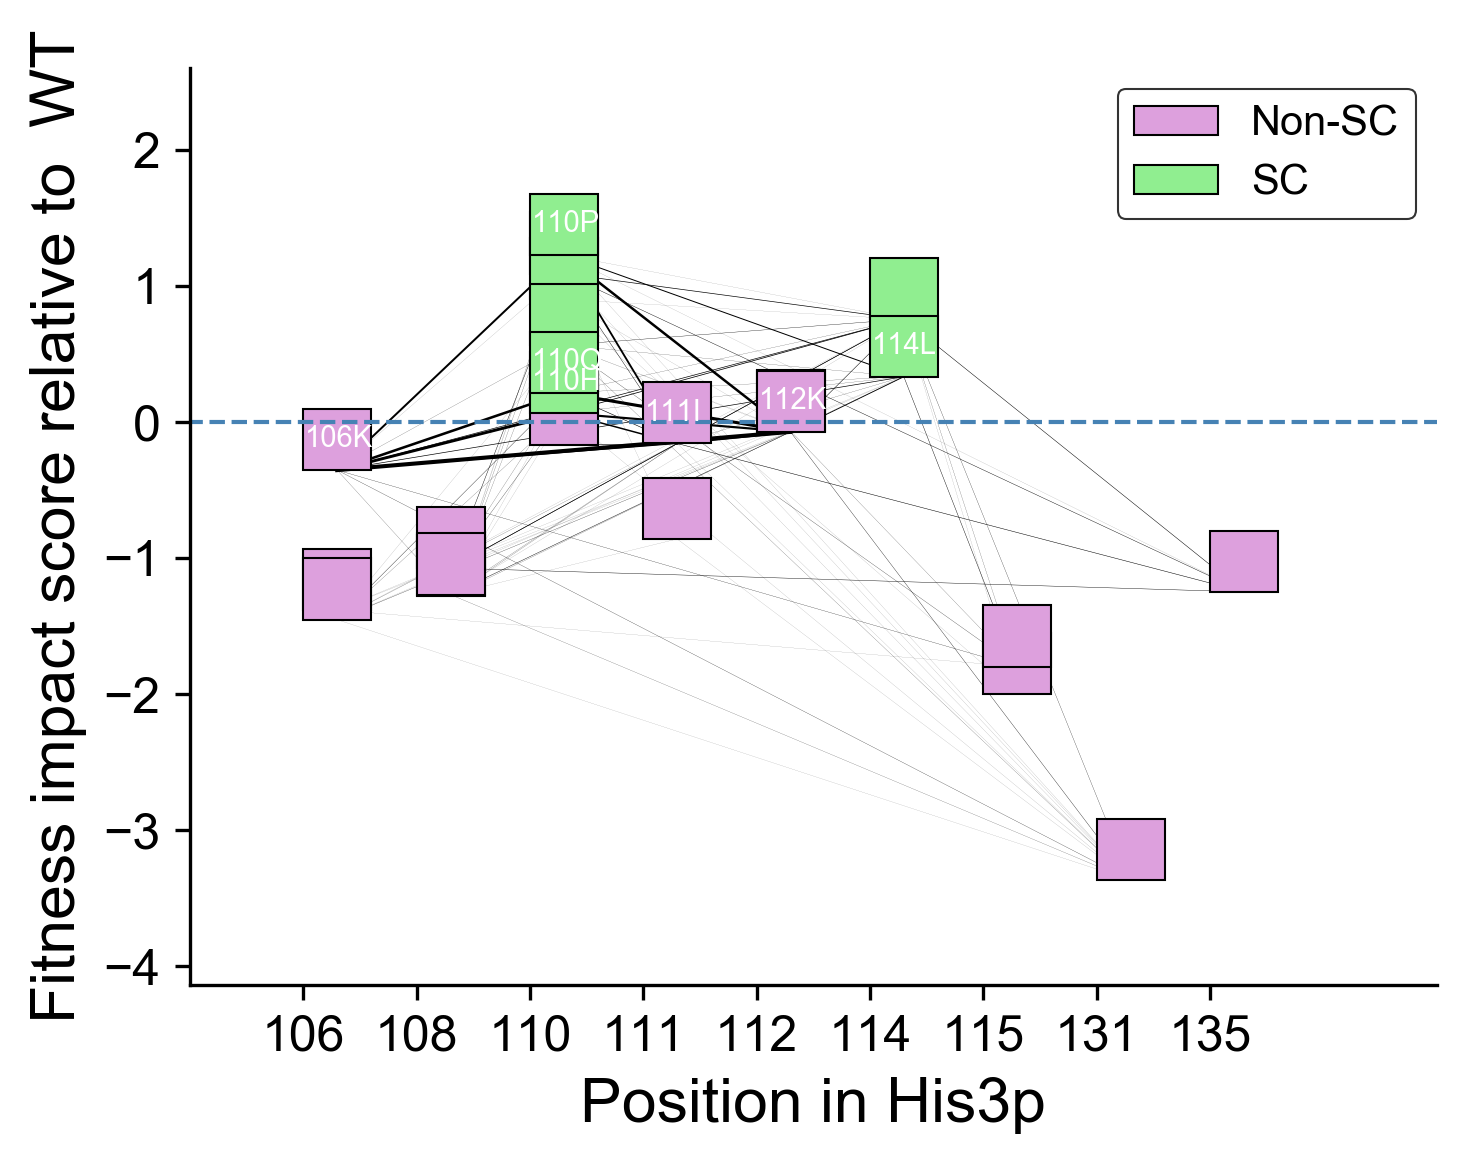

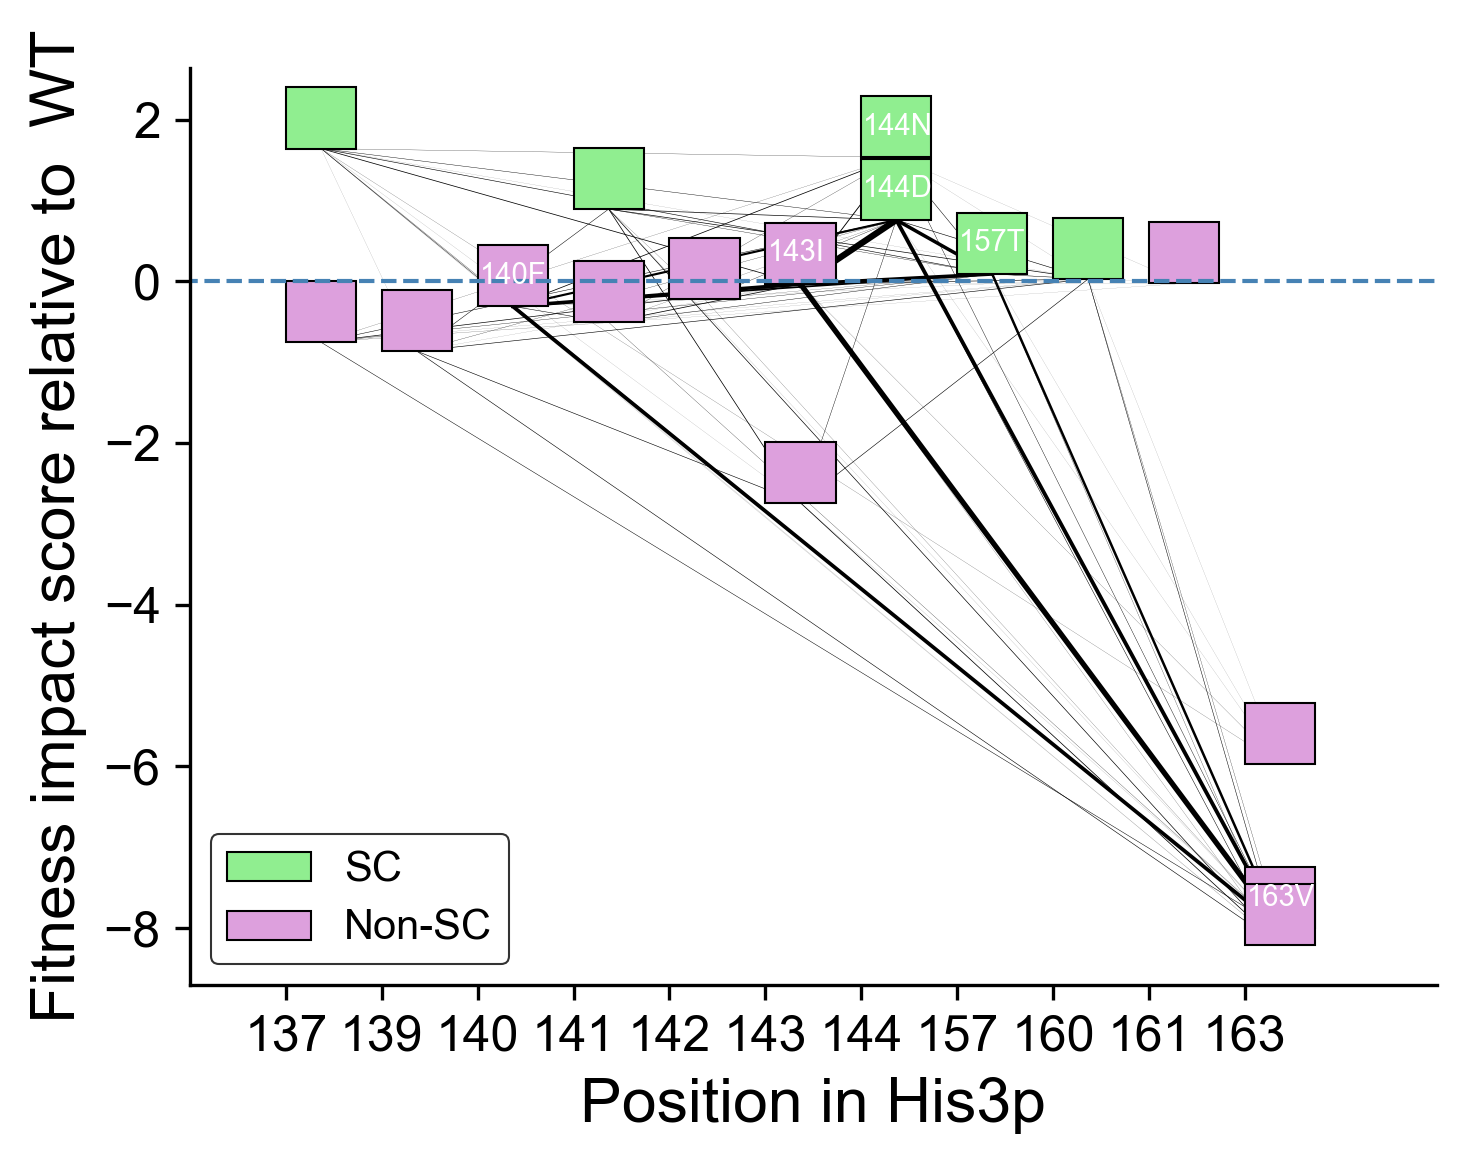

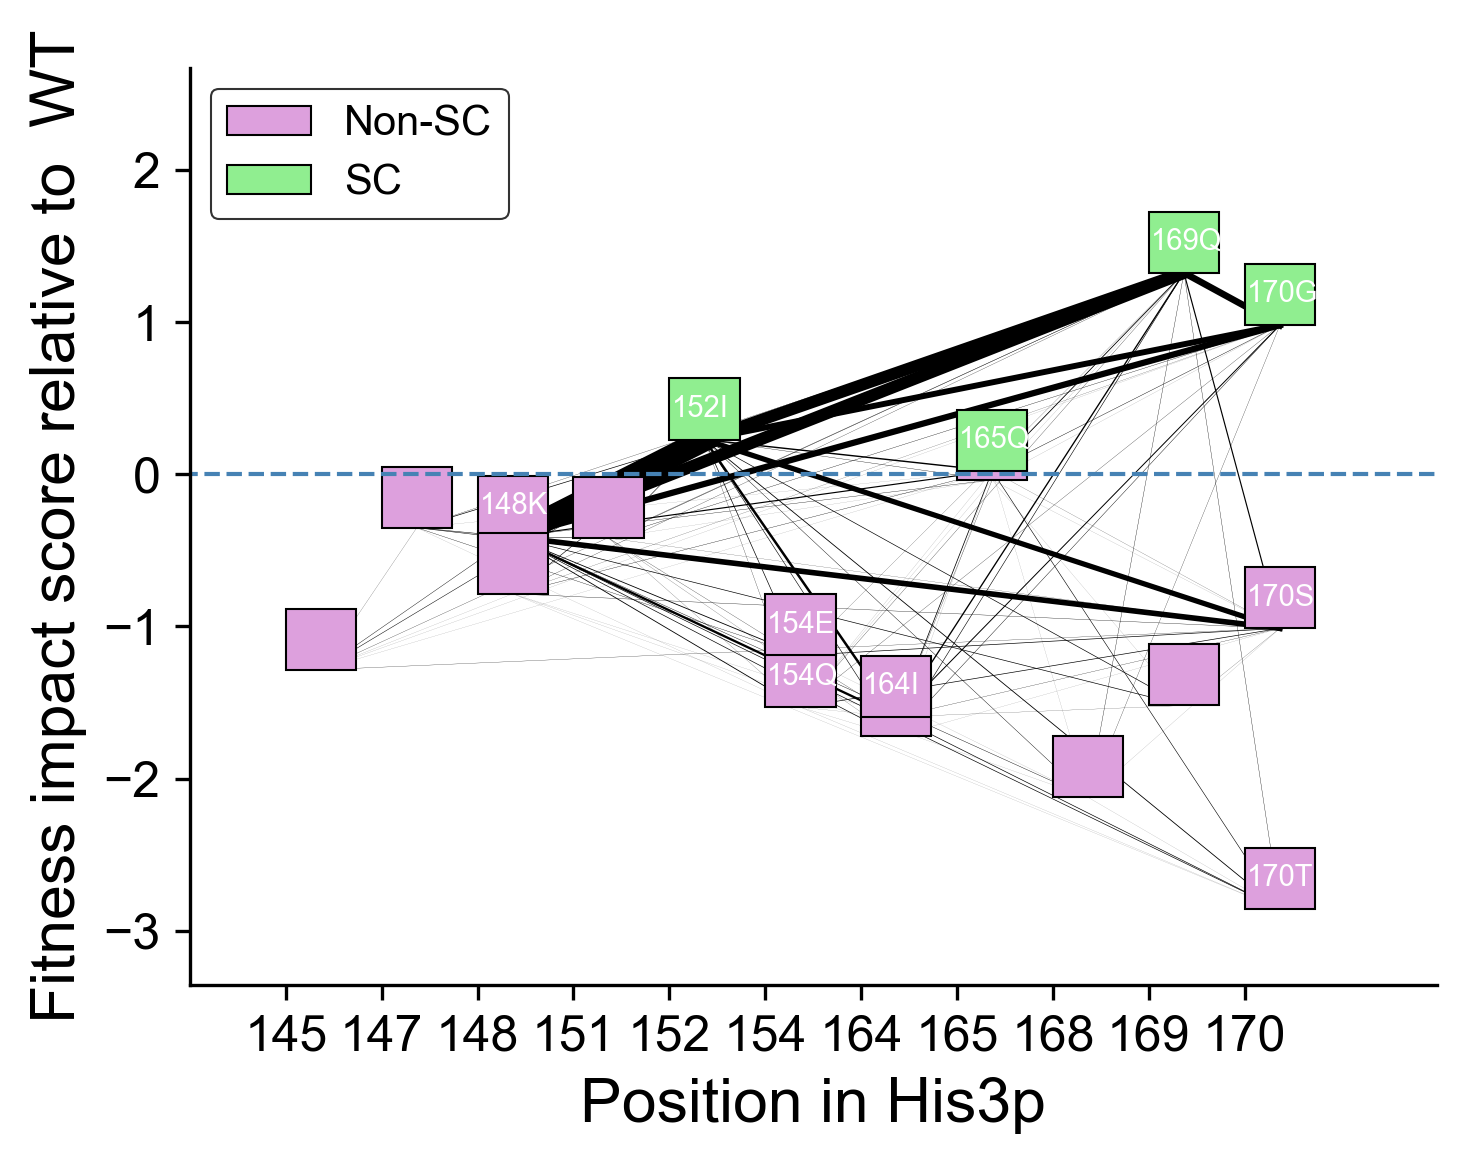

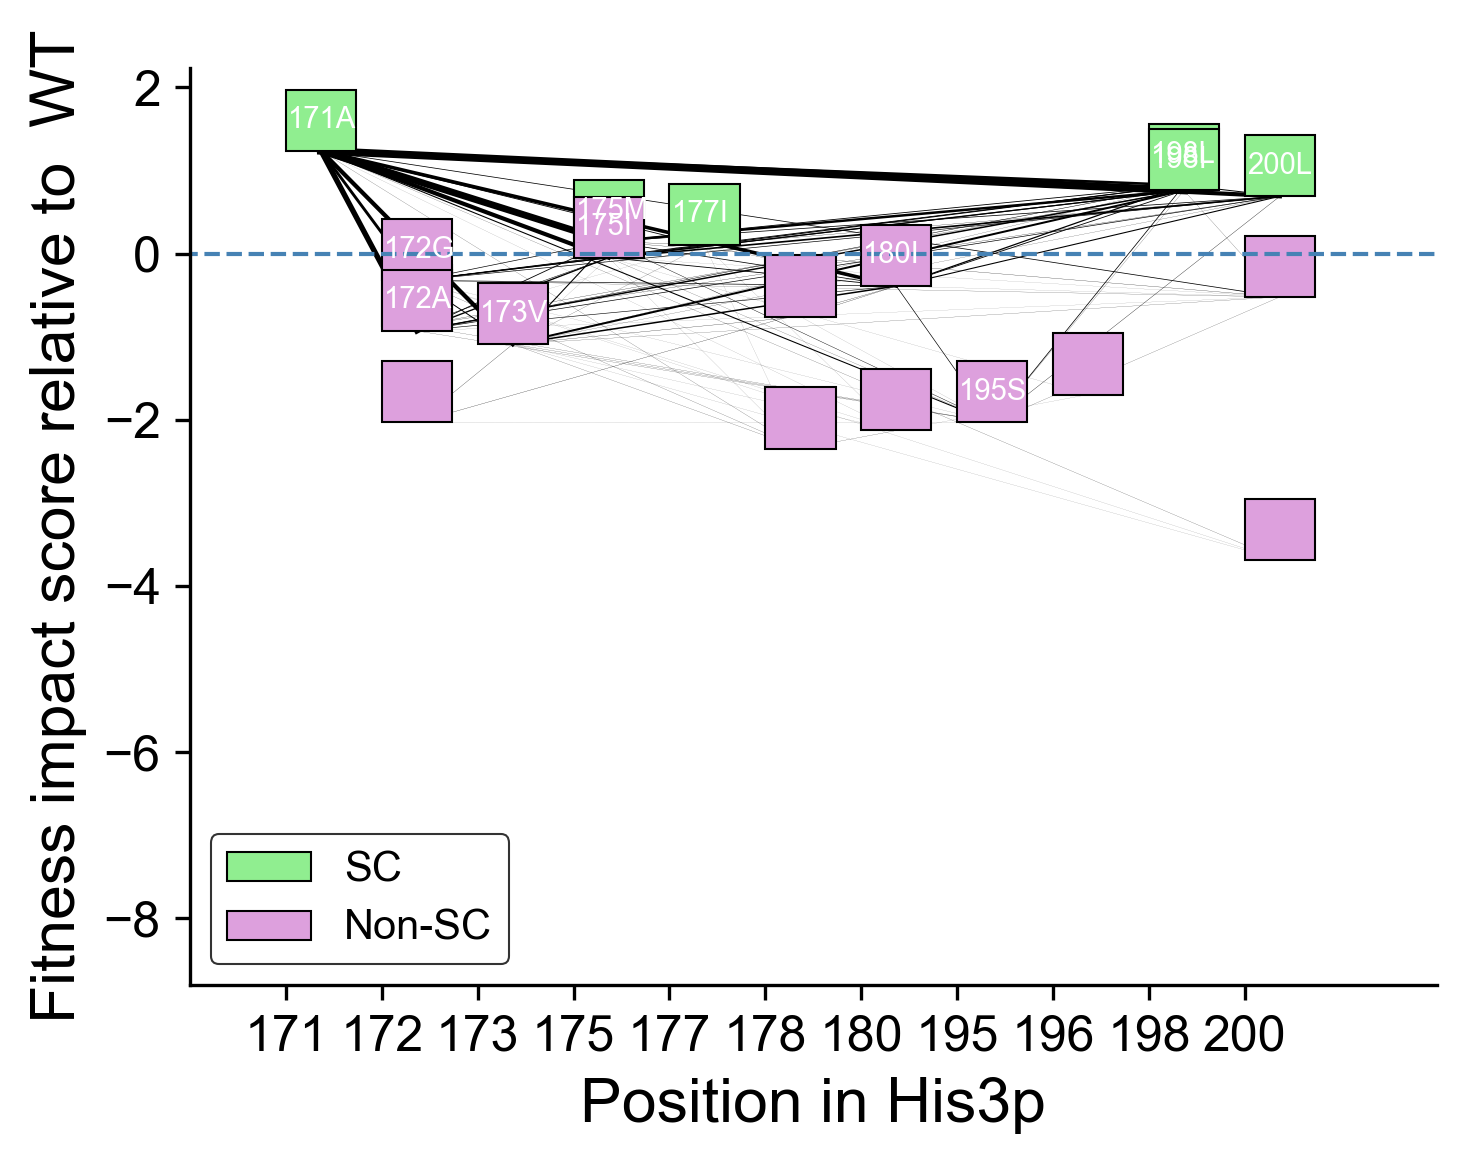

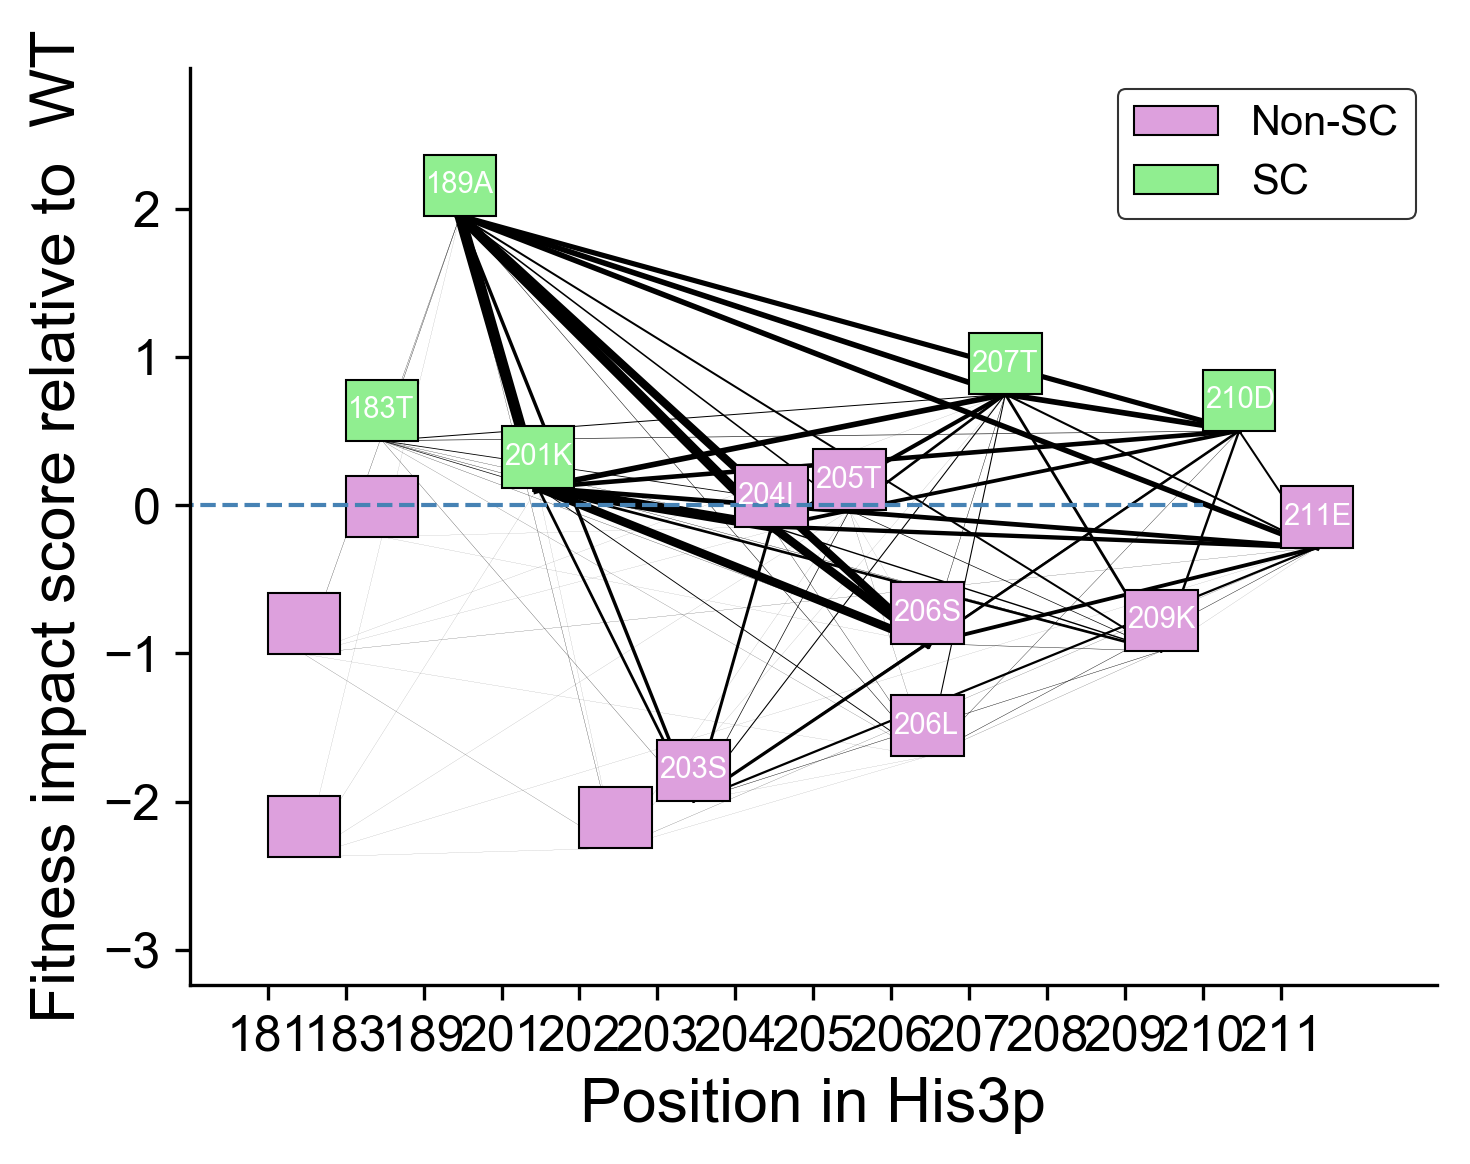

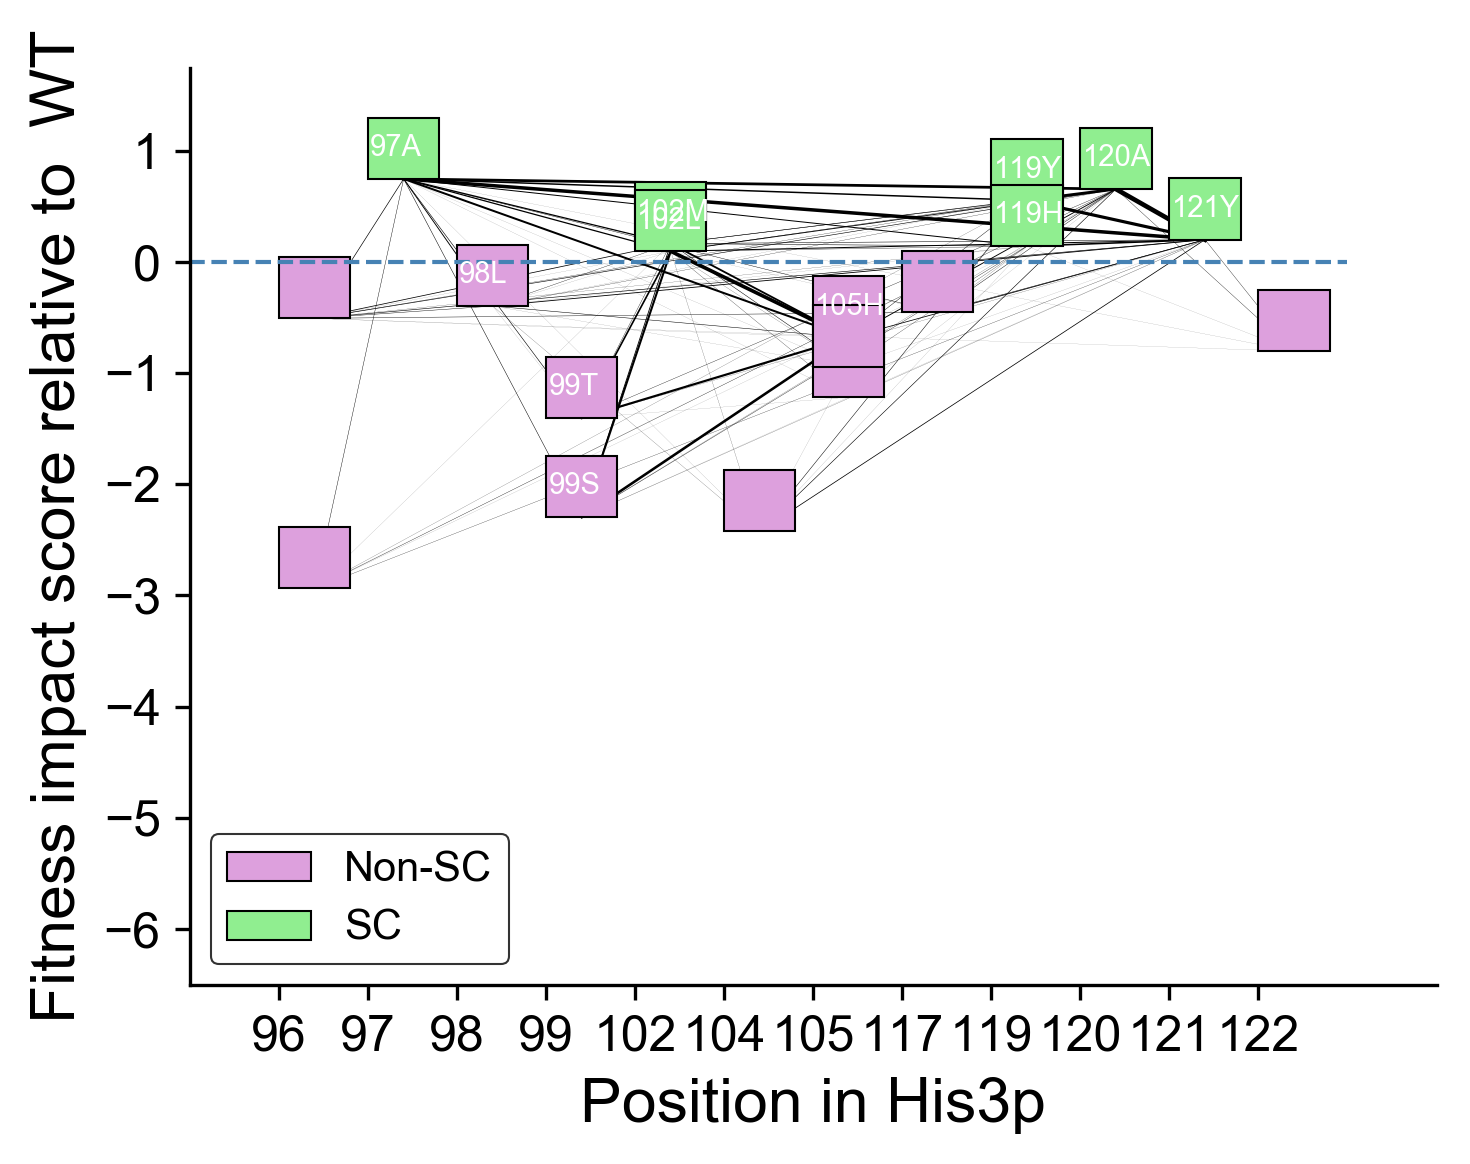

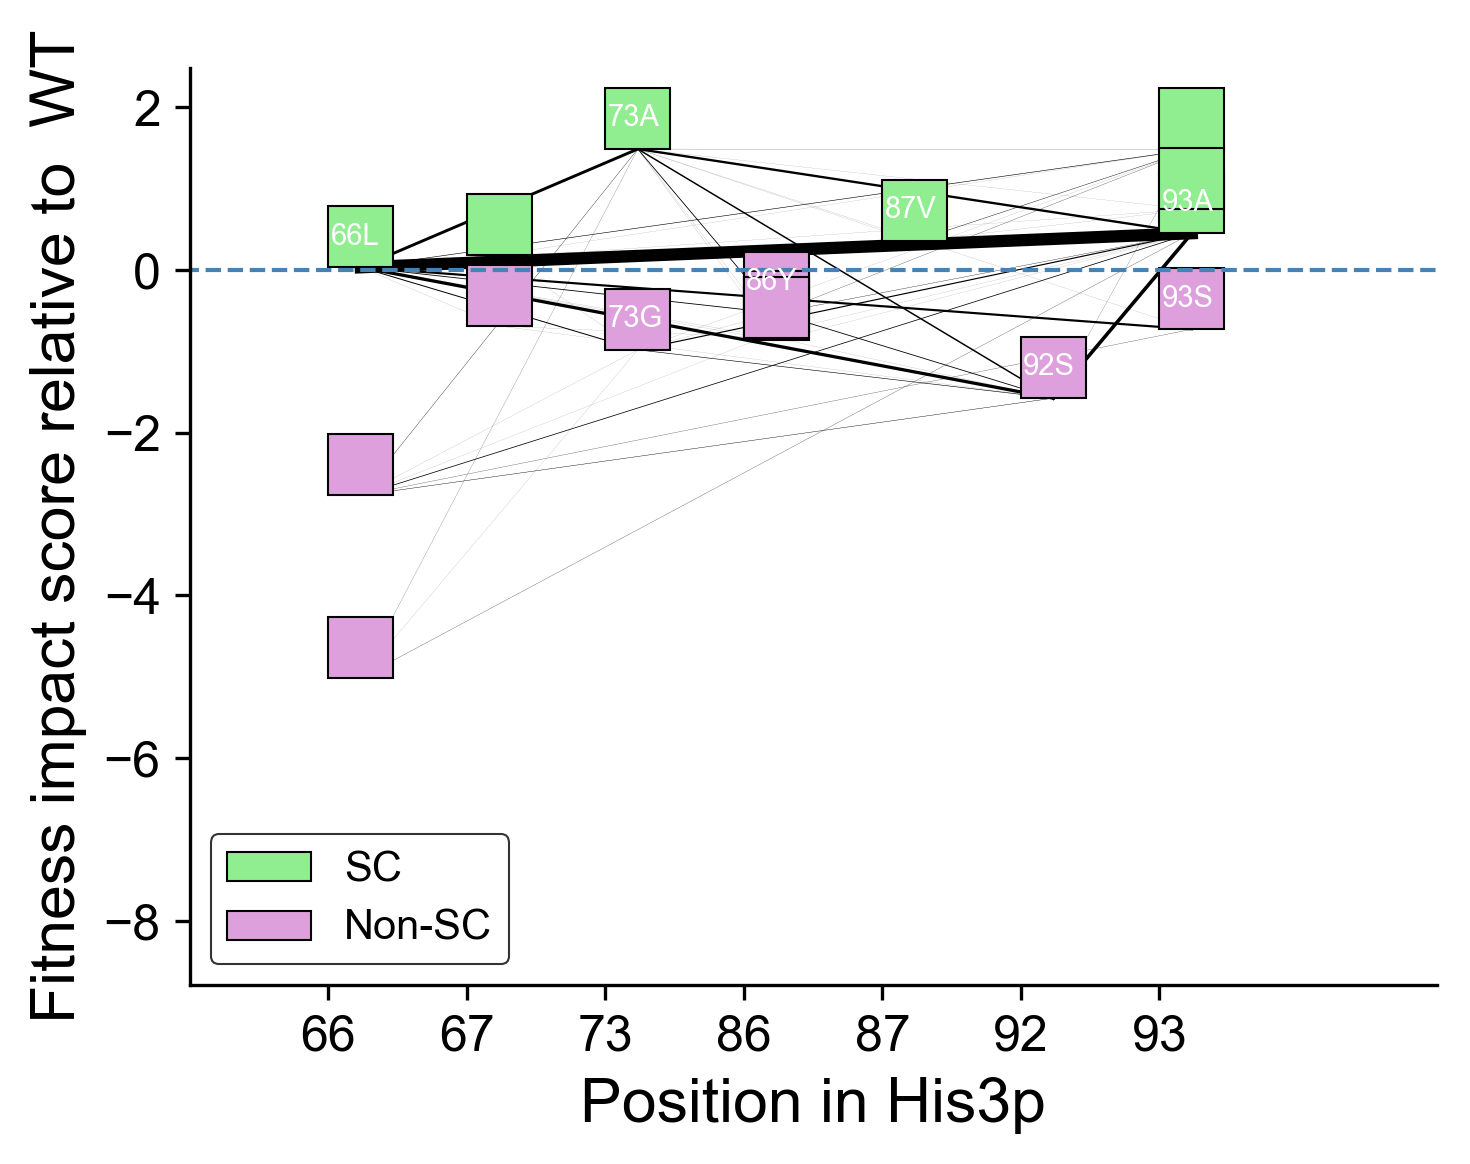

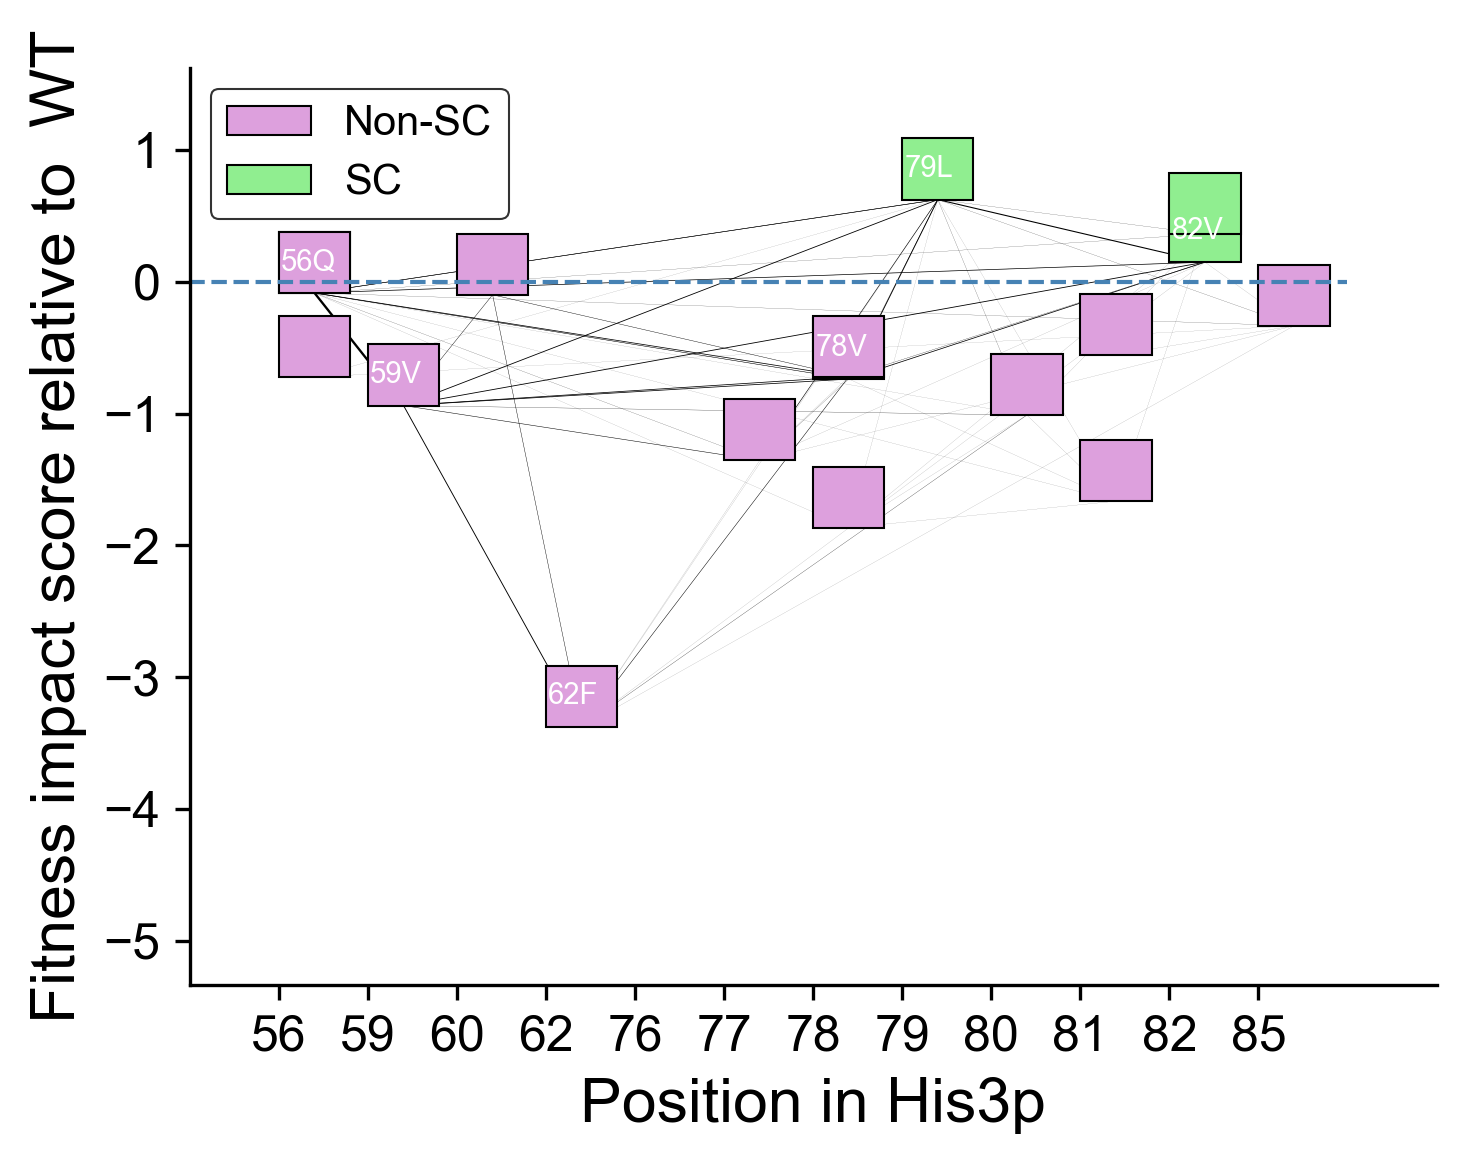

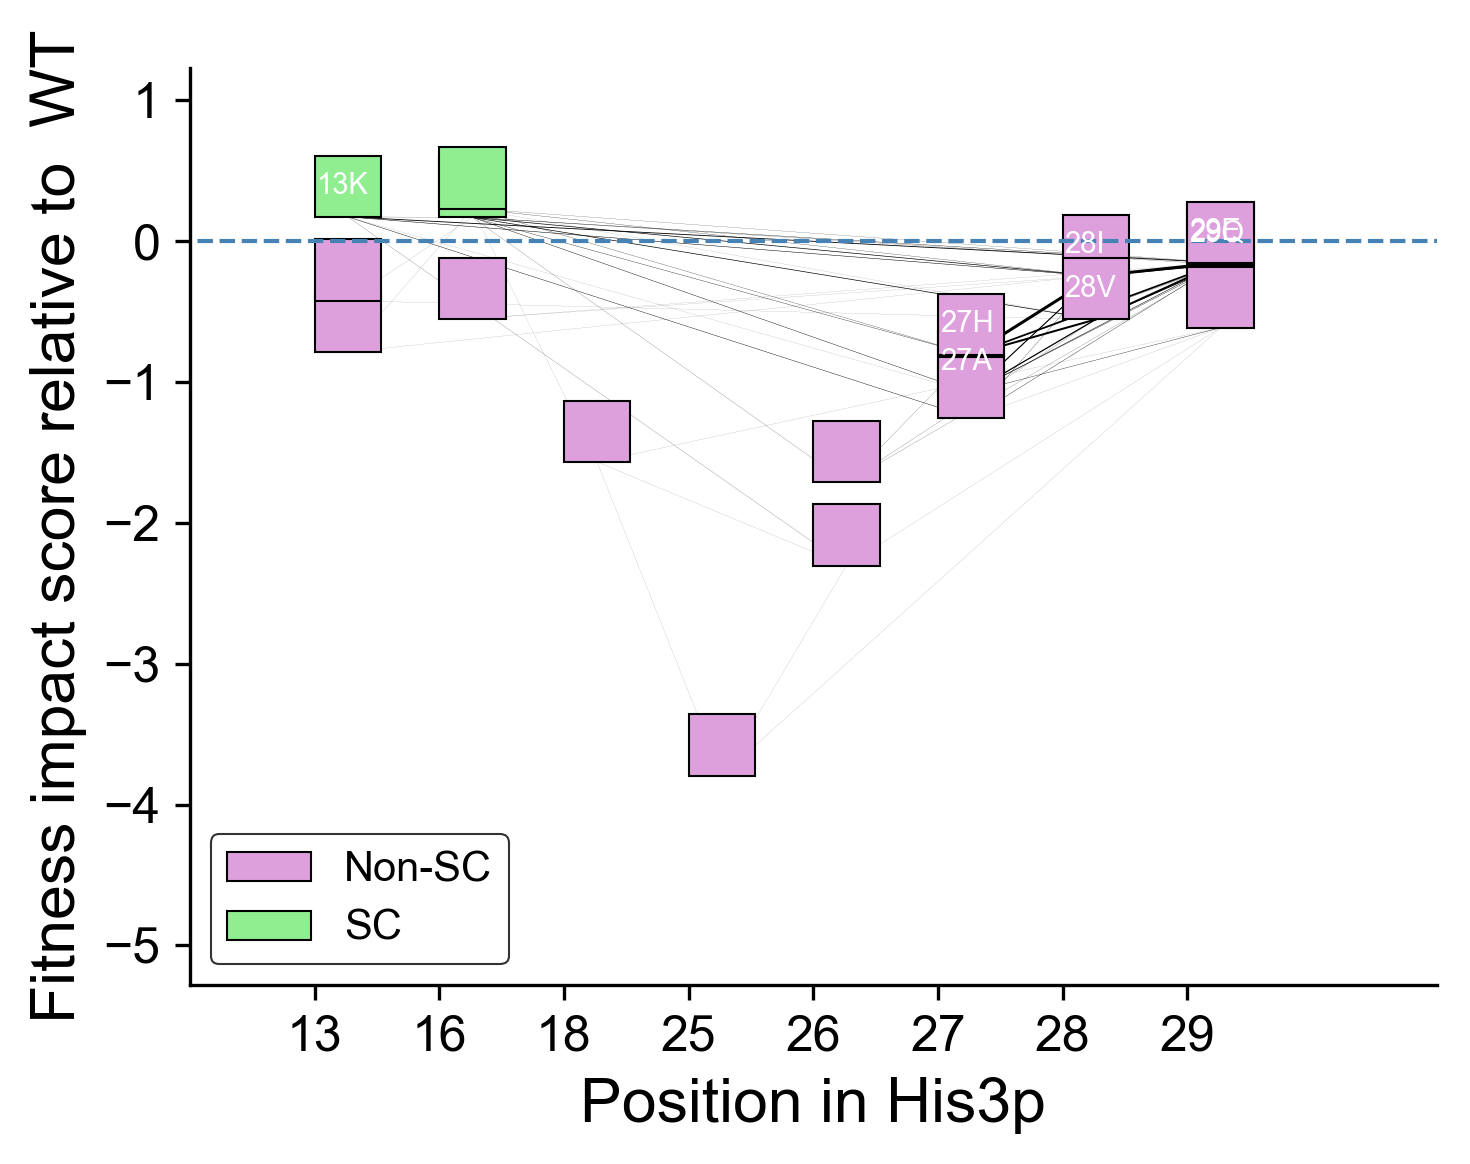

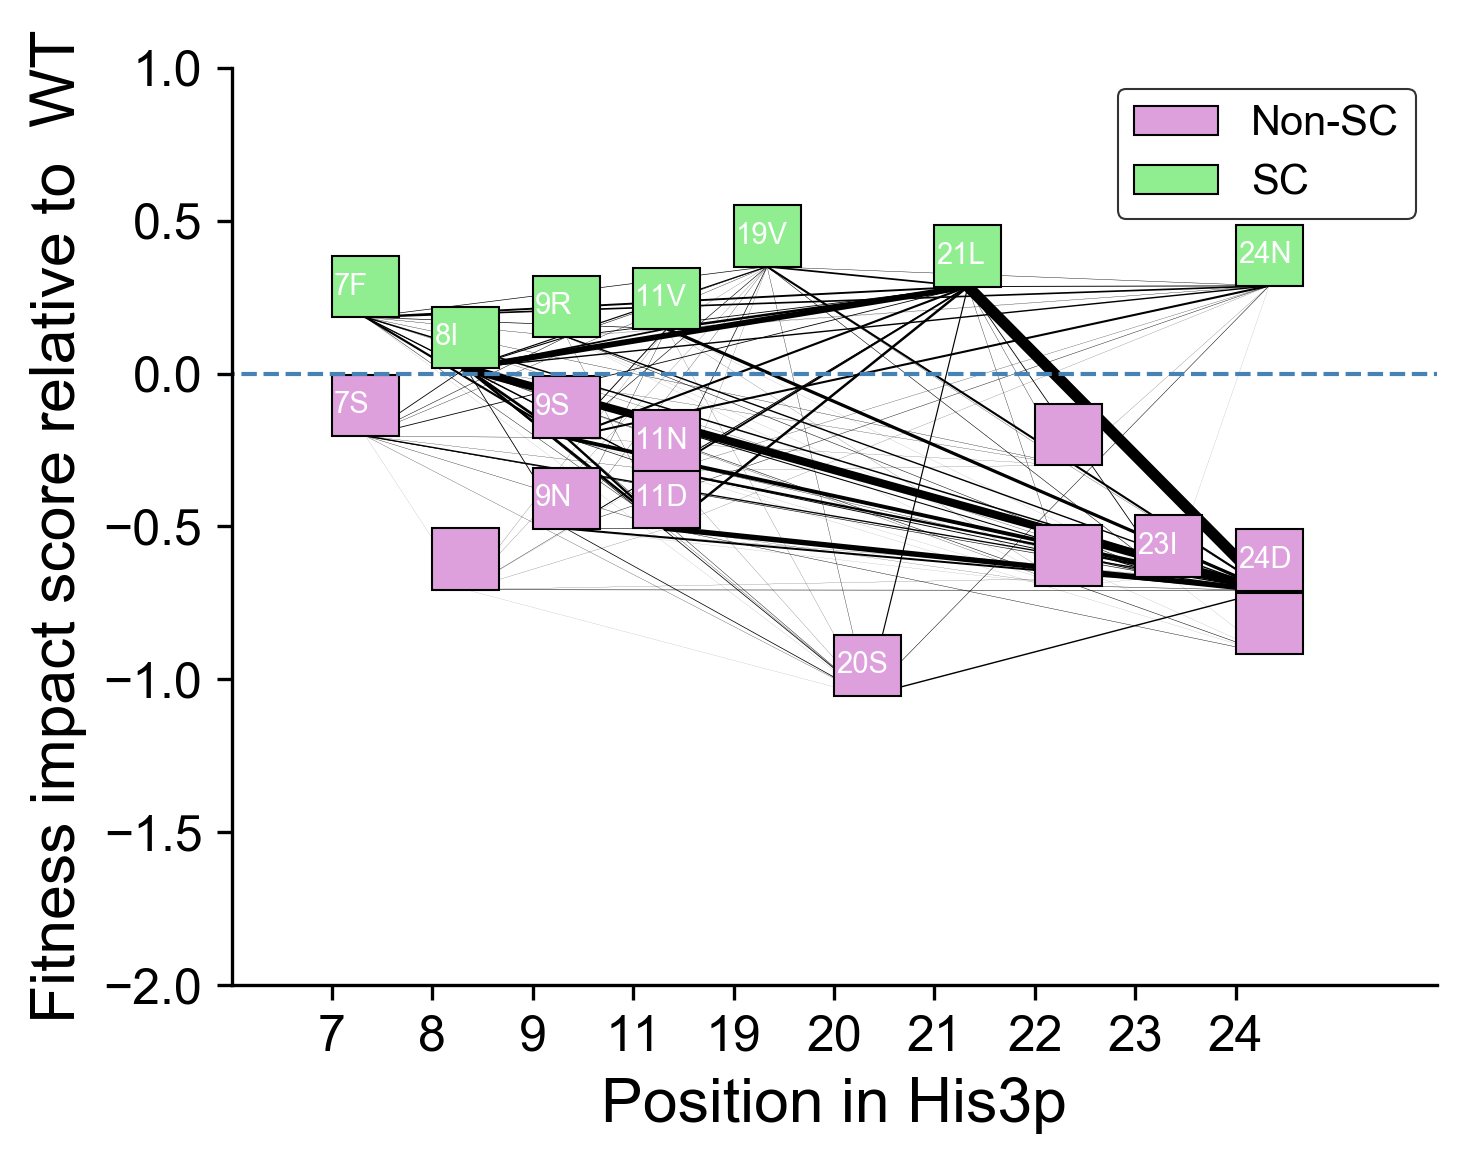

In [32]:
import matplotlib.patches as patches
for segN in (1,2,3,4,5,6,7,8,11,12):
    count_pos = 1
    count_neg = 1
    sc_data_dropwt_singleseg = FP_data[FP_data["segment"] == segN]
    
    fig1 = plt.figure(figsize=(5,4))
    ax1 = fig1.add_subplot(111)
    unique_pos = np.unique(sc_data_dropwt_singleseg["mut_pos"].values)
    unique_pos.sort()
    unique_pos_list = list(unique_pos)
    
    data_pos_count = len(unique_pos)
    if segN != 12:
        ylim1 = np.min(sc_data_dropwt_singleseg["FitnessImpactScoreRelativeWT"].values)-0.5
        ylim2 =  np.max(sc_data_dropwt_singleseg["FitnessImpactScoreRelativeWT"].values)+1
    else:
        ylim1 = -2
        ylim2 = 1

    for pos,fiscore,subname in zip(sc_data_dropwt_singleseg["mut_pos"].values, sc_data_dropwt_singleseg["FitnessImpactScoreRelativeWT"].values,
                          sc_data_dropwt_singleseg["AAstate"].values):
        if subname in non_extant_aa_list:
            continue
        
        if fiscore > 0:
            drow_box(unique_pos_list.index(pos), fiscore,ax1,subname,count_pos,data_pos_count,ylim2-ylim1)
            count_pos += 1
        else:    
            drow_box(unique_pos_list.index(pos), fiscore,ax1,subname,count_neg,data_pos_count,ylim2-ylim1)
            count_neg += 1

    rank_unique_aa_pair_data_singleseg = rank_unique_aa_pair_data[rank_unique_aa_pair_data["segment"] == segN]
    for single_pair,single_count in zip(rank_unique_aa_pair_data_singleseg["allele_pair"].values, rank_unique_aa_pair_data_singleseg["Nsp"].values):
        if single_count < 0:
            continue

        a,b = literal_eval(single_pair)
        add_arrow(a,b,single_count,data_pos_count)
    plt.xlim(-1,
             len(unique_pos)+1)
    plt.ylim( ylim1,ylim2)
    plt.hlines(0,-2,12,linestyles= "--",linewidth = 1,
               color = "steelblue")
    
    #modify the box 
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    plt.xticks(range(len(unique_pos_list)),unique_pos_list,fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlabel("Position in His3p",fontsize = 15)
    plt.ylabel("Fitness impact score relative to  WT",
               fontsize = 15)
    
    
    l = plt.legend(fontsize = 10,
                   edgecolor='black')
    for text in l.get_texts():
        text.set_color("black")
    legend = l.get_frame().set_linewidth(0.5)
    #only save seg1
    plt.tight_layout()
    if segN == 1:
        plt.savefig(savedata_dir + "ReallCoexitInfor.png" , dpi = 300)

C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


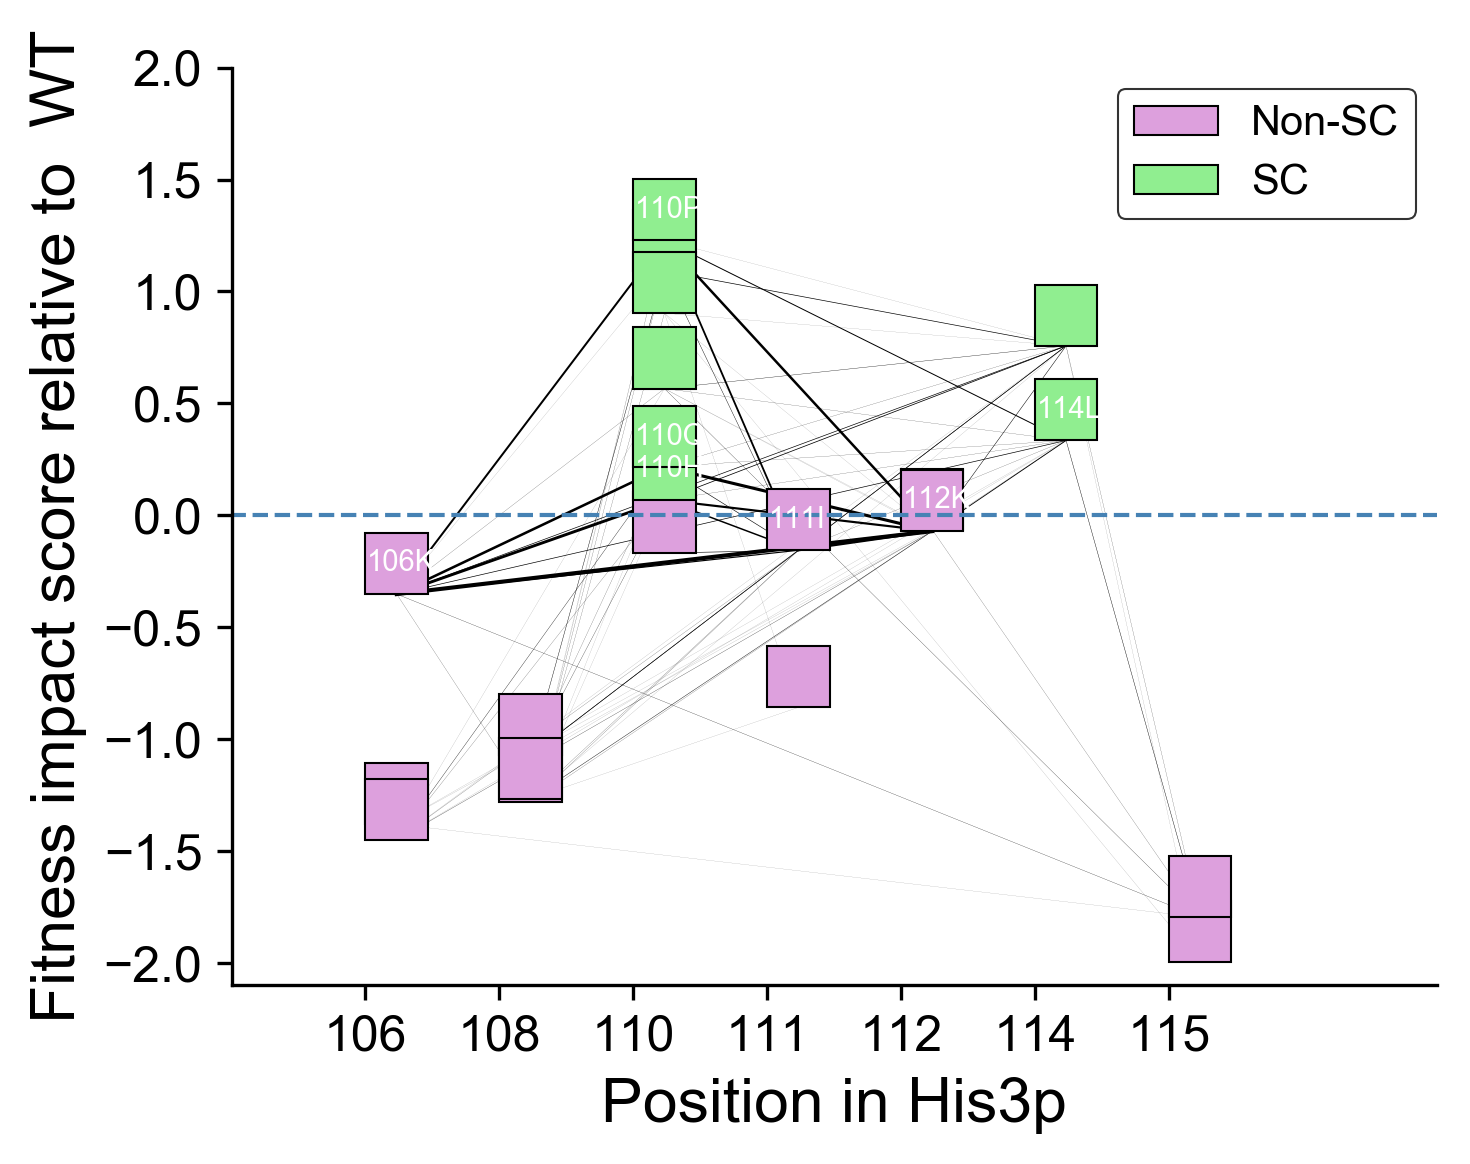

In [54]:
#show the main figure of segment1
import matplotlib.patches as patches
for segN in [1]:
    count_pos = 1
    count_neg = 1
    sc_data_dropwt_singleseg = FP_data[FP_data["segment"] == segN]
    sc_data_dropwt_singleseg = sc_data_dropwt_singleseg[sc_data_dropwt_singleseg["mut_pos"]<131]
    
    fig1 = plt.figure(figsize=(5,4))
    ax1 = fig1.add_subplot(111)
    unqiue_pos = np.unique(sc_data_dropwt_singleseg["mut_pos"].values)
    unique_pos_list = list(unique_pos)
    
    data_pos_count = len(unique_pos)
    ylim2 = 2
    ylim1 = -2.1
    

    for pos,fiscore,subname in zip(sc_data_dropwt_singleseg["mut_pos"].values, sc_data_dropwt_singleseg["FitnessImpactScoreRelativeWT"].values,
                          sc_data_dropwt_singleseg["AAstate"].values):
        if subname in non_extant_aa_list:
            continue
        
        if fiscore > 0:
            drow_box(unique_pos_list.index(pos), fiscore,ax1,subname,count_pos,data_pos_count,ylim2-ylim1)
            count_pos += 1
        else:    
            drow_box(unique_pos_list.index(pos), fiscore,ax1,subname,count_neg,data_pos_count,ylim2-ylim1)
            count_neg += 1

    rank_unique_aa_pair_data_singleseg = rank_unique_aa_pair_data[rank_unique_aa_pair_data["segment"] == segN]
    label_list = [ ]
    for i in rank_unique_aa_pair_data_singleseg["allele_pair"].values:
        if ('131' in i) | ('135' in i):
            label_list.append(0)
        else:
            label_list.append(1)
    rank_unique_aa_pair_data_singleseg["label"] = label_list
    rank_unique_aa_pair_data_singleseg=rank_unique_aa_pair_data_singleseg[rank_unique_aa_pair_data_singleseg["label"] == 1]
    
    for single_pair,single_count in zip(rank_unique_aa_pair_data_singleseg["allele_pair"].values, rank_unique_aa_pair_data_singleseg["Nsp"].values):
        if single_count < 0:
            continue

        a,b = literal_eval(single_pair)
        add_arrow(a,b,single_count,data_pos_count)
    plt.xlim(-1,
             len(unique_pos)+1)
    plt.ylim( ylim1,ylim2)
    plt.hlines(0,-2,12,linestyles= "--",linewidth = 1,
               color = "steelblue")
    
    #modify the box 
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    plt.xticks(range(len(unique_pos_list)),unique_pos_list,fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlabel("Position in His3p",fontsize = 15)
    plt.ylabel("Fitness impact score relative to  WT",
               fontsize = 15)
    
    
    l = plt.legend(fontsize = 10,
                   edgecolor='black')
    for text in l.get_texts():
        text.set_color("black")
    legend = l.get_frame().set_linewidth(0.5)
    #only save seg1
    plt.tight_layout()
    #if segN == 1:
        #plt.savefig(savedata_dir + "ReallCoexitInfor.png" , dpi = 300)


    if segN == 1:
        plt.savefig(savedata_dir + "ReallCoexitInforMain.png" , dpi = 300)

In [46]:
%history

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
from ast import literal_eval

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/Figure11/"
#connect the amino acid states which are co-exist in extant species 
#load the FP_data 
FP_data = pd.read_csv(readdata_dir + "SuperCompensationFile/SubBufferingAbility.tsv",sep = "\t")
FP_data
#load the map data 
map_data = pd.read_csv(readdata_dir +  "RSAWCNConservationInterfaceFile/355SpeciesHis3Allignment.csv",sep=",")
map_data
#load the aa_frequency data
aminoacid_20 = ["G","A","V","L","I","P","F","Y","W","S","T","C","M","N","Q","D","E","K","R","H"]
matrix_0_219 = np.zeros((220,20))
count = 0
#store the length 
length = 220
for f_n in rang